# Classification report - Biased Models

### Target dataset

In [88]:
TARGET_DATASET = 'TwReyes2013.biased'
# Get project root
path = !pwd
report_path = '{}/{}/{}'.format('/'.join(path[0].split('/')[:-1]), 'reports', TARGET_DATASET)
TARGET_DATASET

'TwReyes2013.biased'

### Lista dei file di report relativi alla feature testuale bow

In [89]:
import os
import re
def read_file_list(target_text_feature):
	return [file for file in os.listdir(report_path)
			if file.split('.')[-1] == 'json' and re.match(target_text_feature, file)]
report_file_list_bow = read_file_list('bow')
sorted(report_file_list_bow)

['bow$BayesianNetworks.json',
 'bow$DecisionTreeClassifier.json',
 'bow$MultinomialNB.json',
 'bow$SVC.json',
 'bow-emot$BayesianNetworks.json',
 'bow-emot$DecisionTreeClassifier.json',
 'bow-emot$MultinomialNB.json',
 'bow-emot$SVC.json',
 'bow-pos$BayesianNetworks.json',
 'bow-pos$DecisionTreeClassifier.json',
 'bow-pos$MultinomialNB.json',
 'bow-pos$SVC.json',
 'bow-pos-emot$BayesianNetworks.json',
 'bow-pos-emot$DecisionTreeClassifier.json',
 'bow-pos-emot$MultinomialNB.json',
 'bow-pos-emot$SVC.json',
 'bow-pp$BayesianNetworks.json',
 'bow-pp$DecisionTreeClassifier.json',
 'bow-pp$MultinomialNB.json',
 'bow-pp$SVC.json',
 'bow-pp-emot$BayesianNetworks.json',
 'bow-pp-emot$DecisionTreeClassifier.json',
 'bow-pp-emot$MultinomialNB.json',
 'bow-pp-emot$SVC.json',
 'bow-pp-pos$BayesianNetworks.json',
 'bow-pp-pos$DecisionTreeClassifier.json',
 'bow-pp-pos$MultinomialNB.json',
 'bow-pp-pos$SVC.json',
 'bow-pp-pos-emot$BayesianNetworks.json',
 'bow-pp-pos-emot$DecisionTreeClassifier.jso

### Lista dei file di report senza features testuali

In [90]:
def read_file_list_nobow():
    return [file for file in os.listdir(report_path)
            if file.split('$')[0].split('-')[0] not in ['bow', 'bert', 'sbert']
            and file.split('.')[-1] == 'json']
report_file_list_nobow = read_file_list_nobow()
sorted(report_file_list_nobow)


['emot$BayesianNetworks.json',
 'emot$DecisionTreeClassifier.json',
 'emot$MultinomialNB.json',
 'emot$SVC.json',
 'pos$BayesianNetworks.json',
 'pos$DecisionTreeClassifier.json',
 'pos$MultinomialNB.json',
 'pos$SVC.json',
 'pos-emot$BayesianNetworks.json',
 'pos-emot$DecisionTreeClassifier.json',
 'pos-emot$MultinomialNB.json',
 'pos-emot$SVC.json',
 'pp$BayesianNetworks.json',
 'pp$DecisionTreeClassifier.json',
 'pp$MultinomialNB.json',
 'pp$SVC.json',
 'pp-emot$BayesianNetworks.json',
 'pp-emot$DecisionTreeClassifier.json',
 'pp-emot$MultinomialNB.json',
 'pp-emot$SVC.json',
 'pp-pos$BayesianNetworks.json',
 'pp-pos$DecisionTreeClassifier.json',
 'pp-pos$MultinomialNB.json',
 'pp-pos$SVC.json',
 'pp-pos-emot$BayesianNetworks.json',
 'pp-pos-emot$DecisionTreeClassifier.json',
 'pp-pos-emot$MultinomialNB.json',
 'pp-pos-emot$SVC.json']

In [91]:
from pandas import json_normalize
import json

CLASSIFIER_NAME = {
	'DecisionTreeClassifier': 'DecisionTree',
	'SVC': 'SVM',
	'MultinomialNB': 'MultinomialNB',
	'BayesianNetworks': 'BayesianNetworks'
}
# Read all data
def read_report_file(report_file_list):	
	report_list = []
	for report_file in report_file_list:	
		with open('{}/{}'.format(report_path, report_file)) as file:
			data = json.load(file)
			# Save data
			out = dict()
			out['classifier'] = CLASSIFIER_NAME[data['classifier']]
			out['features'] = data['features']
			out['confusion-matrix'] = data['overall']['confusion-matrix']
			out.update(data['overall']['report'])
			report_list.append(out)
	# Radix sort
	report_list.sort(key=lambda x: x['classifier'])
	report_list.sort(key=lambda x: x['features'])
	report_list.sort(key=lambda x: len(x['features'].split('-')))
	return report_list

### Dataframe Bow

In [92]:
report_bow = read_report_file(report_file_list_bow)
df_bow = json_normalize(report_bow)
df_bow.head()

,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support
0,BayesianNetworks,bow,"[[28225.0, 1775.0], [3528.0, 6472.0]]",0.867425,0.889000,0.941000,0.914000,30000.0,0.785000,0.647000,0.709000,10000.0,0.863000,0.867000,0.863000,40000.0,NaN,NaN,NaN,NaN
1,DecisionTree,bow,"[[27514.0, 2486.0], [2954.0, 7046.0]]",0.864000,0.903078,0.917116,0.910024,30000.0,0.739398,0.704487,0.721361,10000.0,0.862149,0.864000,0.862875,40000.0,0.821238,0.810802,0.815693,40000.0
2,MultinomialNB,bow,"[[27355.0, 2645.0], [2267.0, 7733.0]]",0.877200,0.923487,0.911817,0.917592,30000.0,0.745507,0.773294,0.758991,10000.0,0.878985,0.877200,0.877945,40000.0,0.834497,0.842556,0.838291,40000.0
3,SVM,bow,"[[28421.0, 1579.0], [2992.0, 7008.0]]",0.885725,0.904764,0.947354,0.925559,30000.0,0.816374,0.700746,0.754036,10000.0,0.882654,0.885725,0.882686,40000.0,0.860569,0.824050,0.839798,40000.0
4,BayesianNetworks,bow-emot,"[[27988.0, 2012.0], [3395.0, 6605.0]]",0.864825,0.892000,0.933000,0.912000,30000.0,0.767000,0.661000,0.710000,10000.0,0.860000,0.865000,0.861000,40000.0,NaN,NaN,NaN,NaN


### Dataframe no Bow

In [93]:
report_nobow = read_report_file(report_file_list_nobow)
df_nobow = json_normalize(report_nobow)
df_nobow.head()


,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support
0,BayesianNetworks,emot,"[[29267.0, 733.0], [9495.0, 505.0]]",0.744300,0.755000,0.976000,0.851000,30000.0,0.40800,0.051000,0.090000,10000.0,0.668000,0.744000,0.661000,40000.0,NaN,NaN,NaN,NaN
1,DecisionTree,emot,"[[28684.0, 1316.0], [8762.0, 1238.0]]",0.748050,0.766016,0.956146,0.850576,30000.0,0.48523,0.123786,0.197152,10000.0,0.695911,0.748050,0.687233,40000.0,0.625623,0.539966,0.523864,40000.0
2,MultinomialNB,emot,"[[29102.0, 898.0], [9429.0, 571.0]]",0.741825,0.755281,0.970061,0.849299,30000.0,0.38952,0.057048,0.099456,10000.0,0.663889,0.741825,0.661868,40000.0,0.572400,0.513554,0.474378,40000.0
3,SVM,emot,"[[30000.0, 0.0], [10000.0, 0.0]]",0.750000,0.750000,1.000000,0.857138,30000.0,0.00000,0.000000,0.000000,10000.0,0.562513,0.750000,0.642862,40000.0,0.375000,0.500000,0.428569,40000.0
4,BayesianNetworks,pos,"[[26012.0, 3988.0], [6041.0, 3959.0]]",0.749275,0.812000,0.867000,0.838000,30000.0,0.49800,0.396000,0.441000,10000.0,0.733000,0.749000,0.739000,40000.0,NaN,NaN,NaN,NaN


## Features a confronto
### Weighted average
- Precision
- Recall
- F1
- Accuracy

In [94]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
%matplotlib inline

FONTSIZE = 20
FONTSIZE_TITLE = 24
Y_SIZE = 14
plt.rc('font', size=FONTSIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONTSIZE_TITLE)     # fontsize of the axes title
colors = get_cmap("Set1").colors

reports_list = ['weighted avg.precision', 'weighted avg.recall', 'weighted avg.f1-score', 'accuracy']
report_dict = {'weighted avg.precision': 'Precision',
			   'weighted avg.recall': 'Recall',
			   'weighted avg.f1-score': 'F1',
			   'accuracy': 'Accuracy'}

def evaluate_features_data(df, classifier):
	plot_values = []
	for feature in features_list:
		values = []
		for report in reports_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_features(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, Y_SIZE))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4.5
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	for i, (values, report, color) in enumerate(zip(plot_values, reports_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=report_dict[report])
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.55
	plt.ylim(min_value - min_value * 0.1, 1.02)
	# Legend
	ax.legend()
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()

### Features con BOW

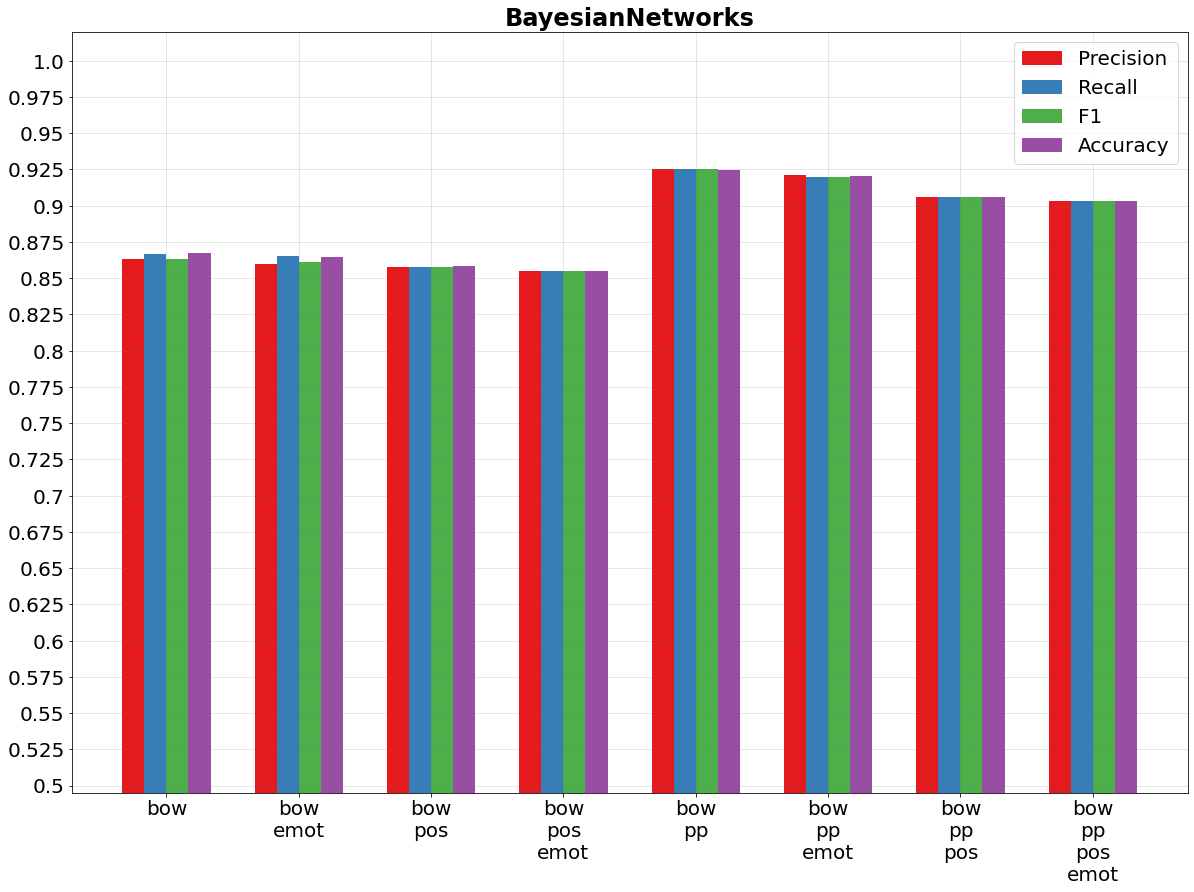

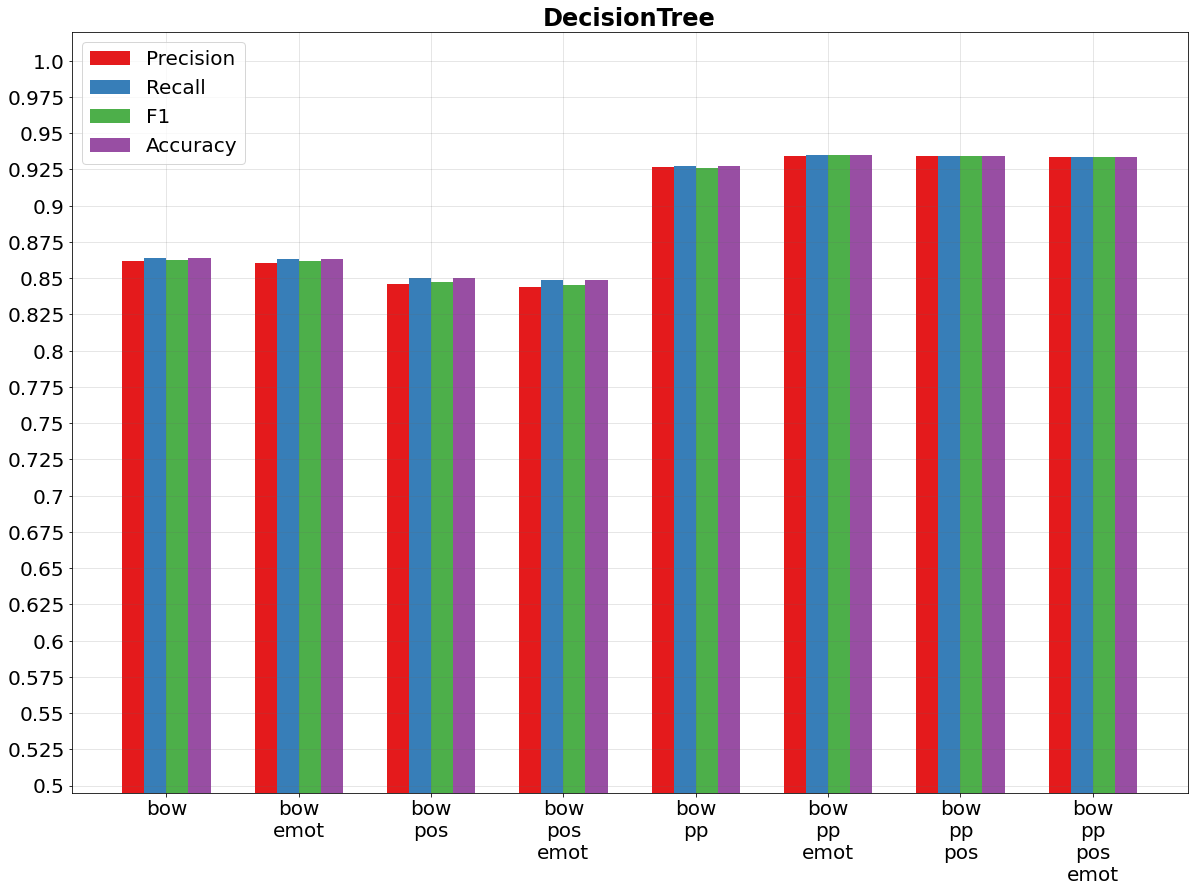

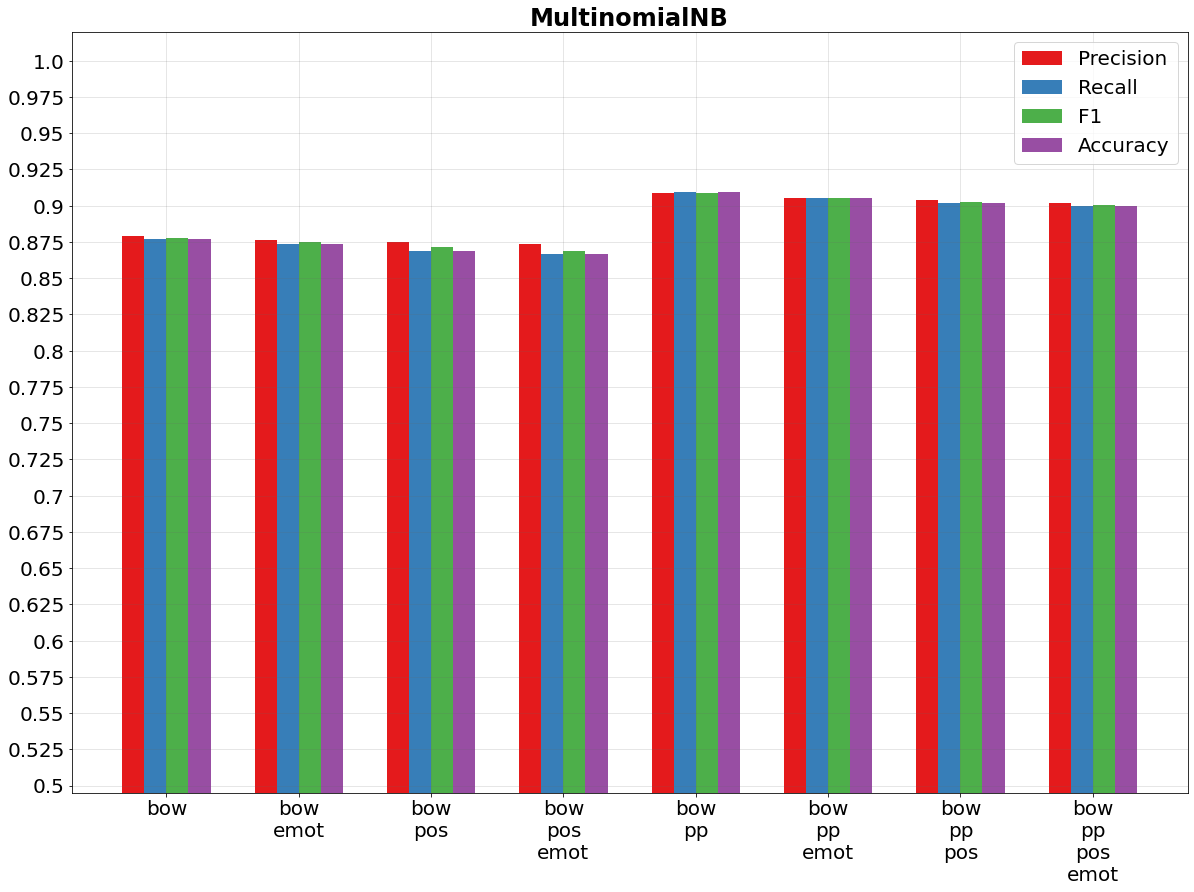

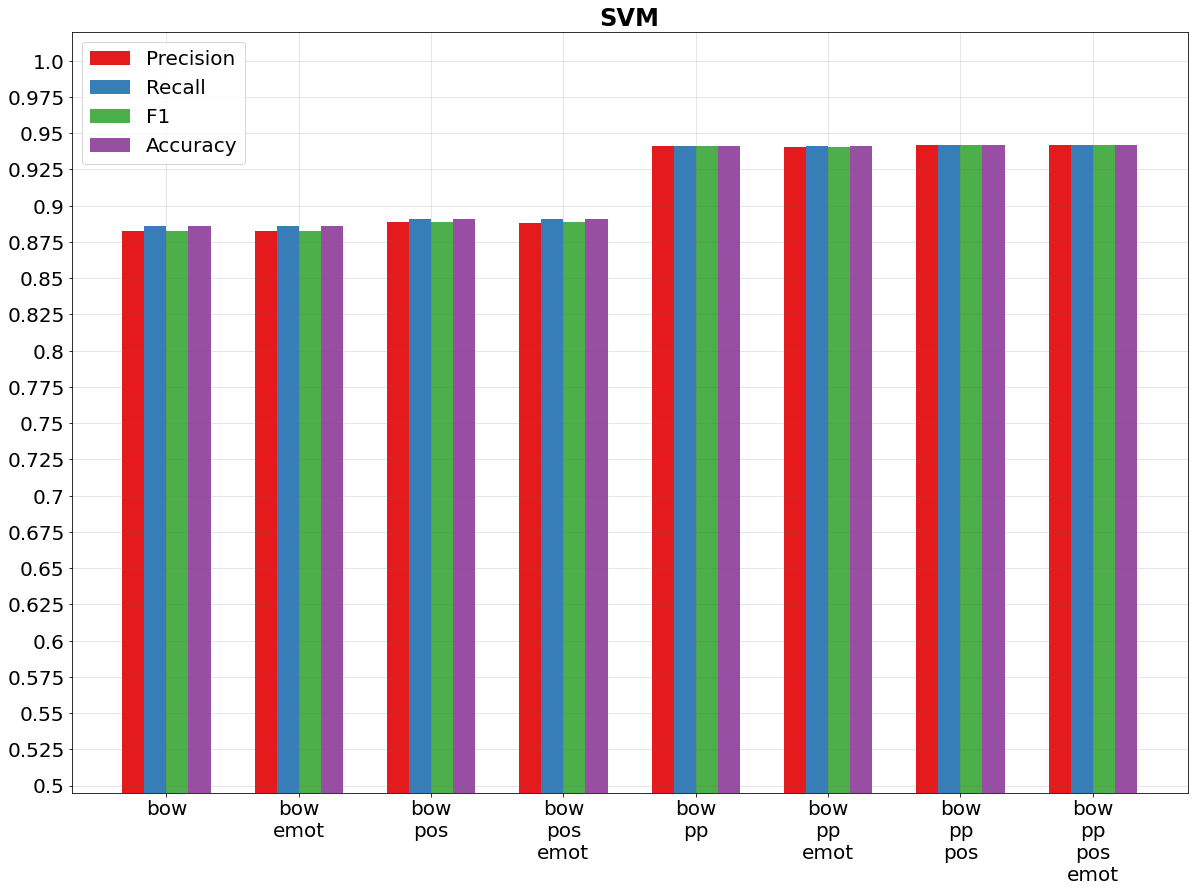

In [95]:
features_list = df_bow['features'].unique()
# Swap element
features_list[3], features_list[4] = features_list[4], features_list[3]
# Plot each classifier
for classifier in df_bow['classifier'].unique():
	values = evaluate_features_data(df_bow, classifier)
	plot_features(values, classifier)

### Features senza BOW

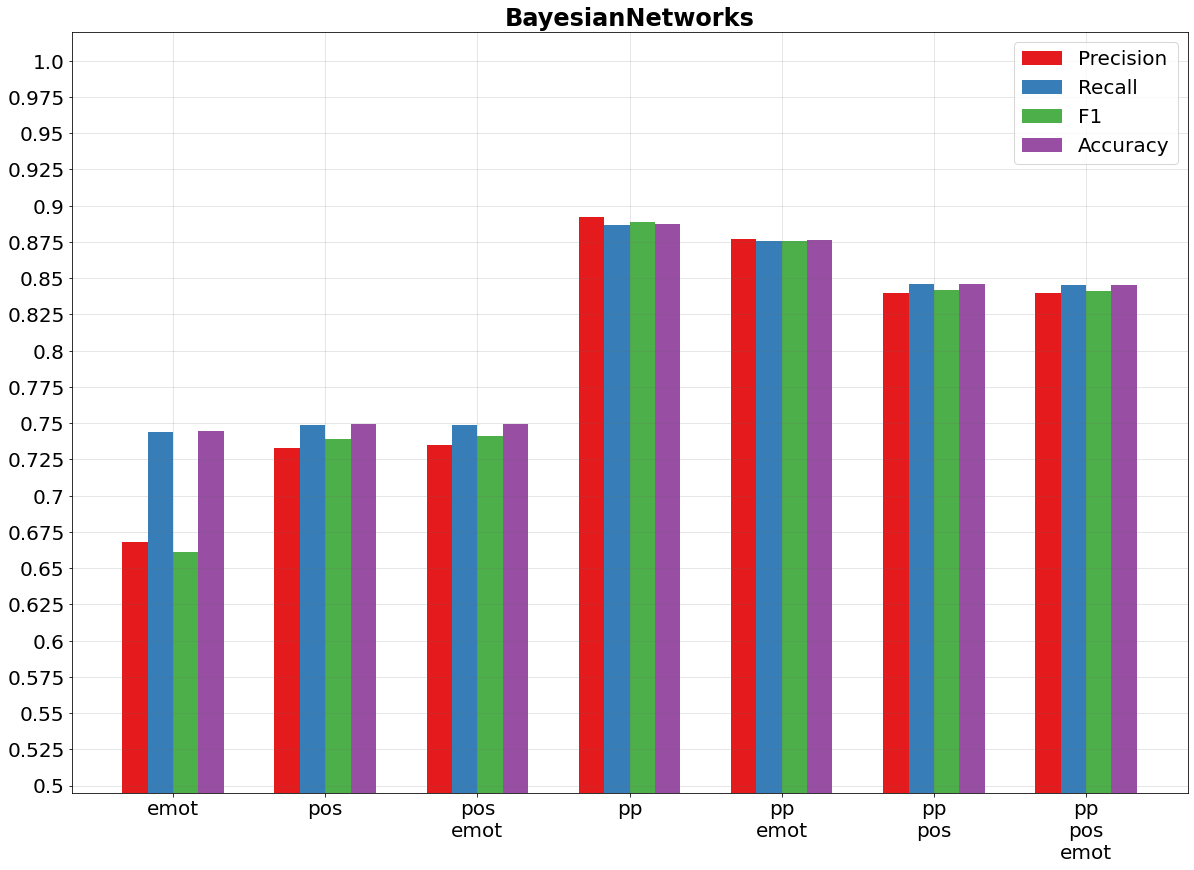

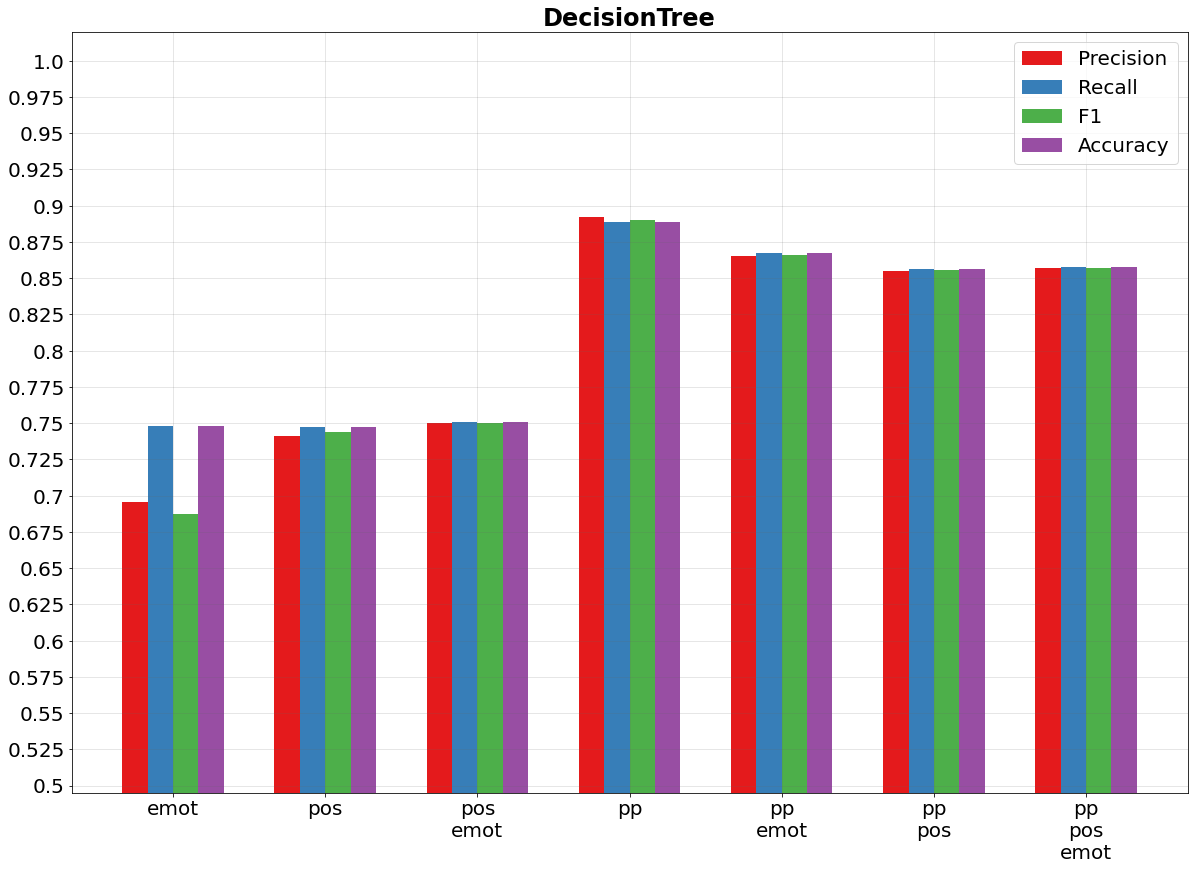

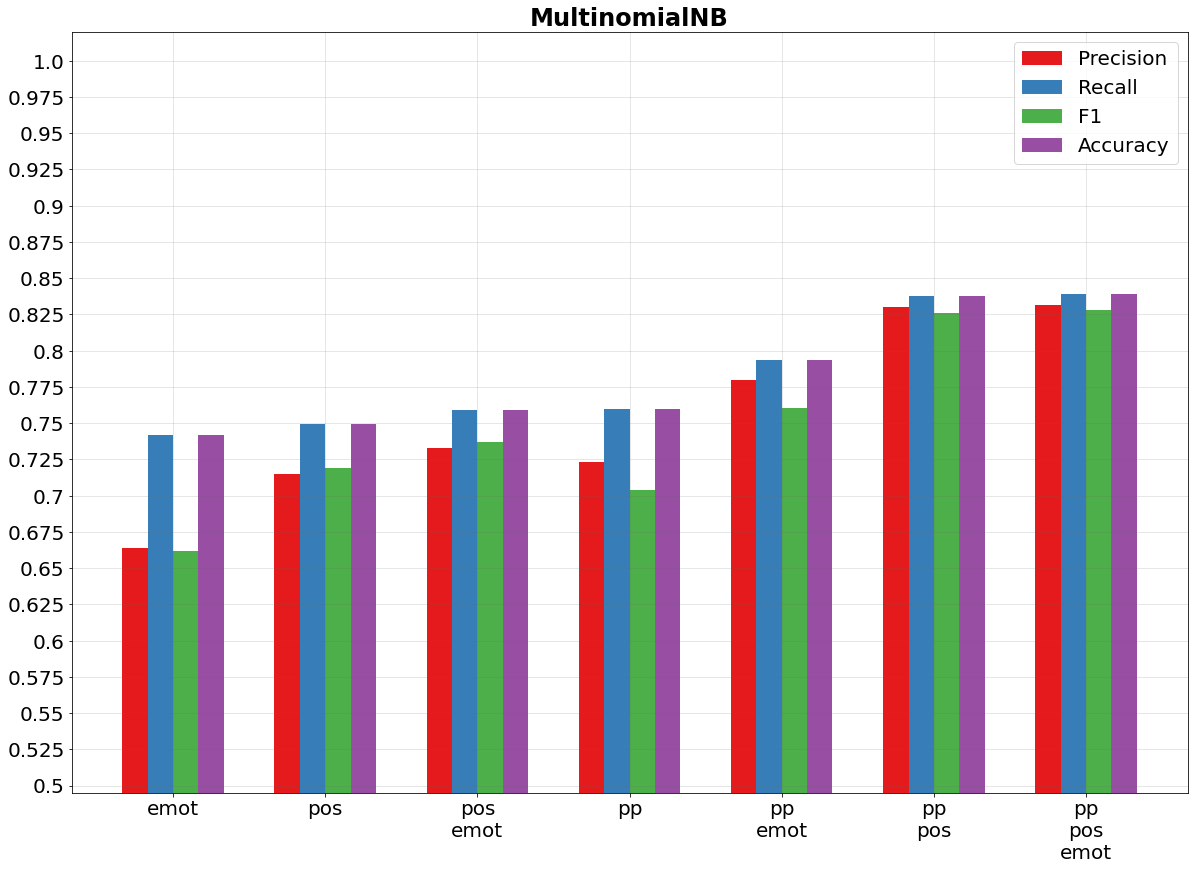

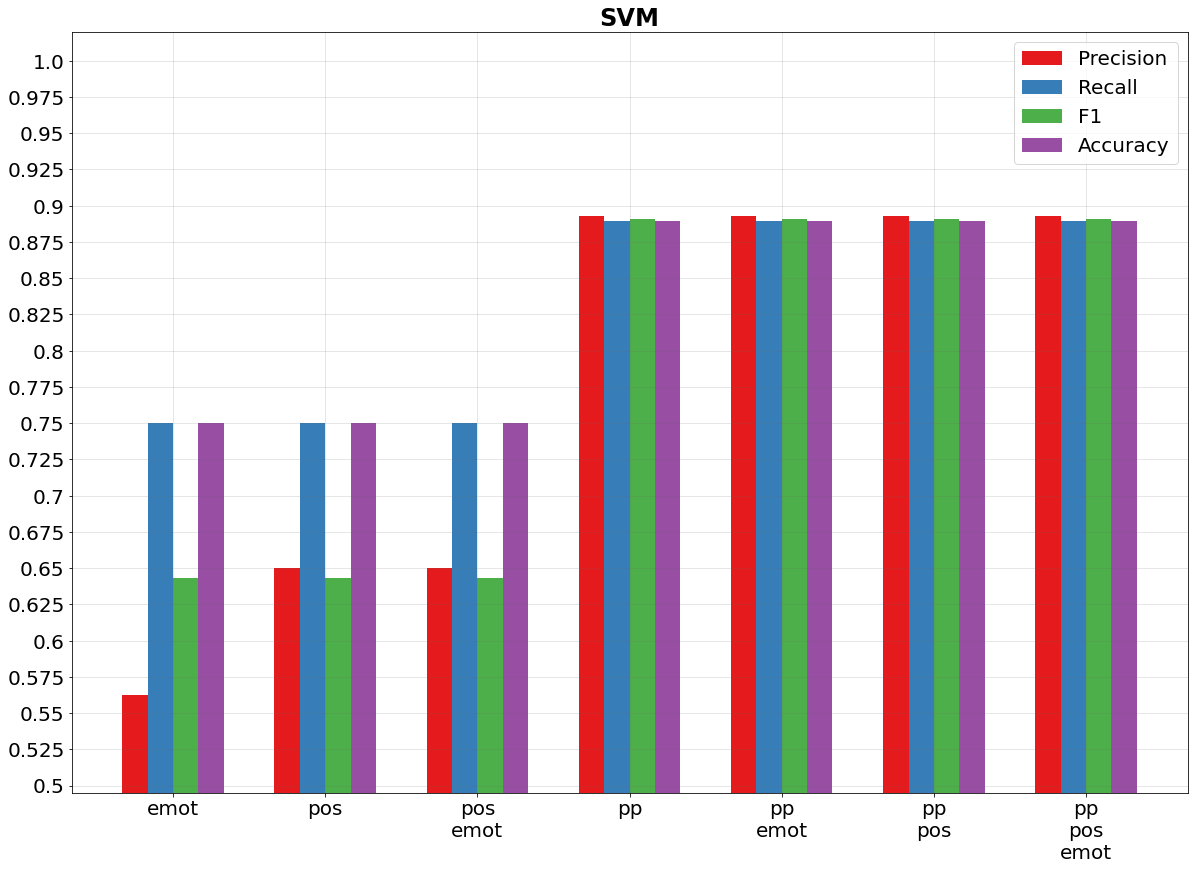

In [96]:
features_list = df_nobow['features'].unique()
# Swap element
features_list[2], features_list[3] = features_list[3], features_list[2]
# Plot each classifier
for classifier in df_nobow['classifier'].unique():
	values = evaluate_features_data(df_nobow, classifier)
	plot_features(values, classifier)

## Ironic / Non ironic

In [97]:
reports_list = ['{}.precision', '{}.recall', '{}.f1-score']

def evaluate_emotions_data(df, classifier):
	reports = [r.format('False') for r in reports_list] + [r.format('True') for r in reports_list]
	plot_values = []
	for report in reports:
		values = []
		for feature in features_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_emotions(plot_values, classifier):
	# Figure
	title = '{}'.format(classifier, 'Non ' if type == 'False' else '')
	# Plot
	fig, ax = plt.subplots(figsize=(19, Y_SIZE + 4))
	bar_width = 0.4
	# Axis idx
	indx = np.arange(len(reports_list) * 2) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.025, 0.025)]
	# Data
	for i, (values, feature, color) in enumerate(zip(plot_values, features_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=feature)
	# X axis
	ax.set_xticks(indx + bar_width * 3)
	names = ['Precision{}','Recall{}', 'F1{}']
	x_labels = [feature.format('-') for feature in names] + [feature.format('+') for feature in names] 
	ax.set_xticklabels(x_labels)
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	plt.ylim(0, 1.30)
	# Legend
	ax.legend()
	plt.title(title, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	# Show
	plt.show()

### Features con BOW

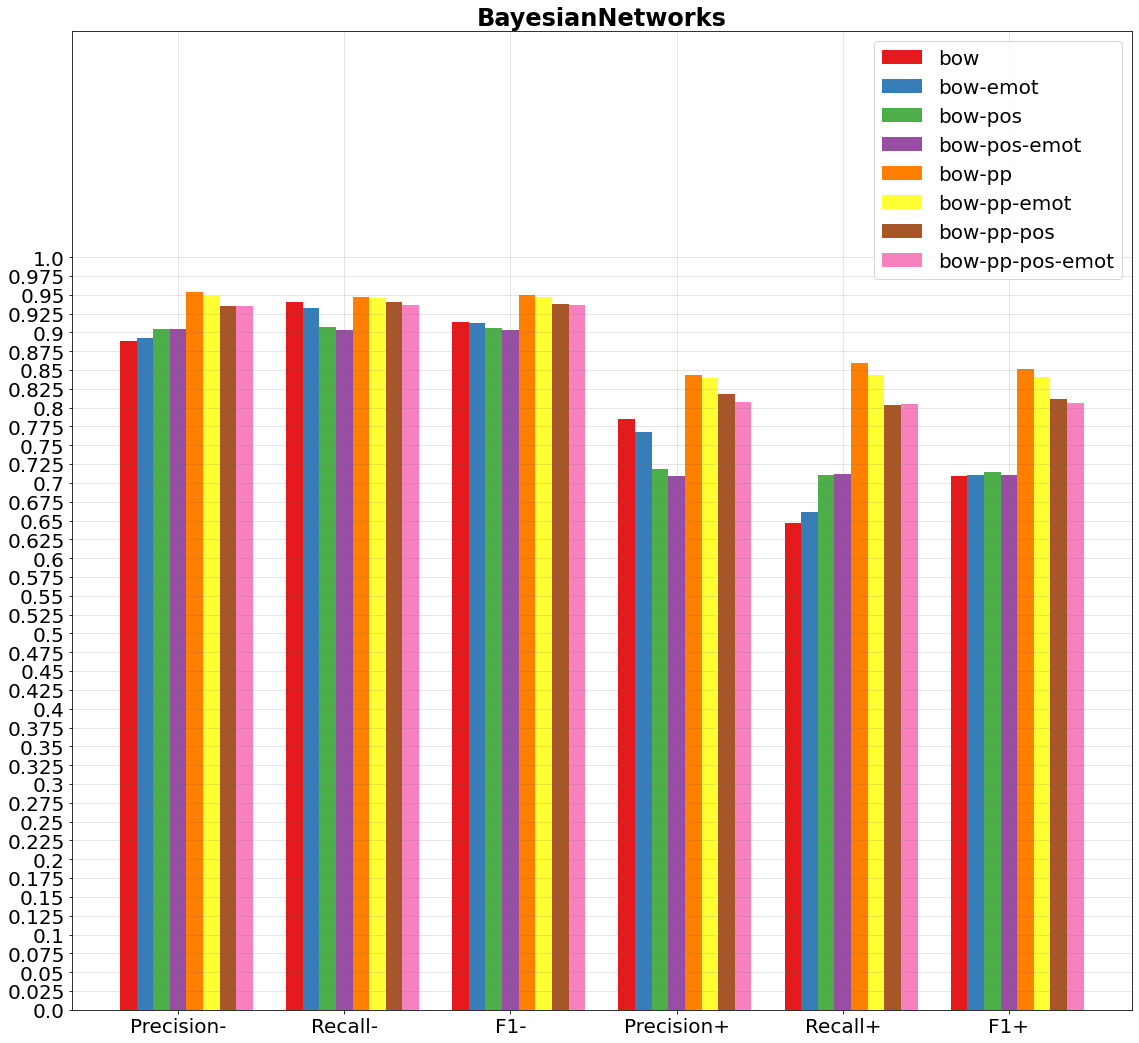

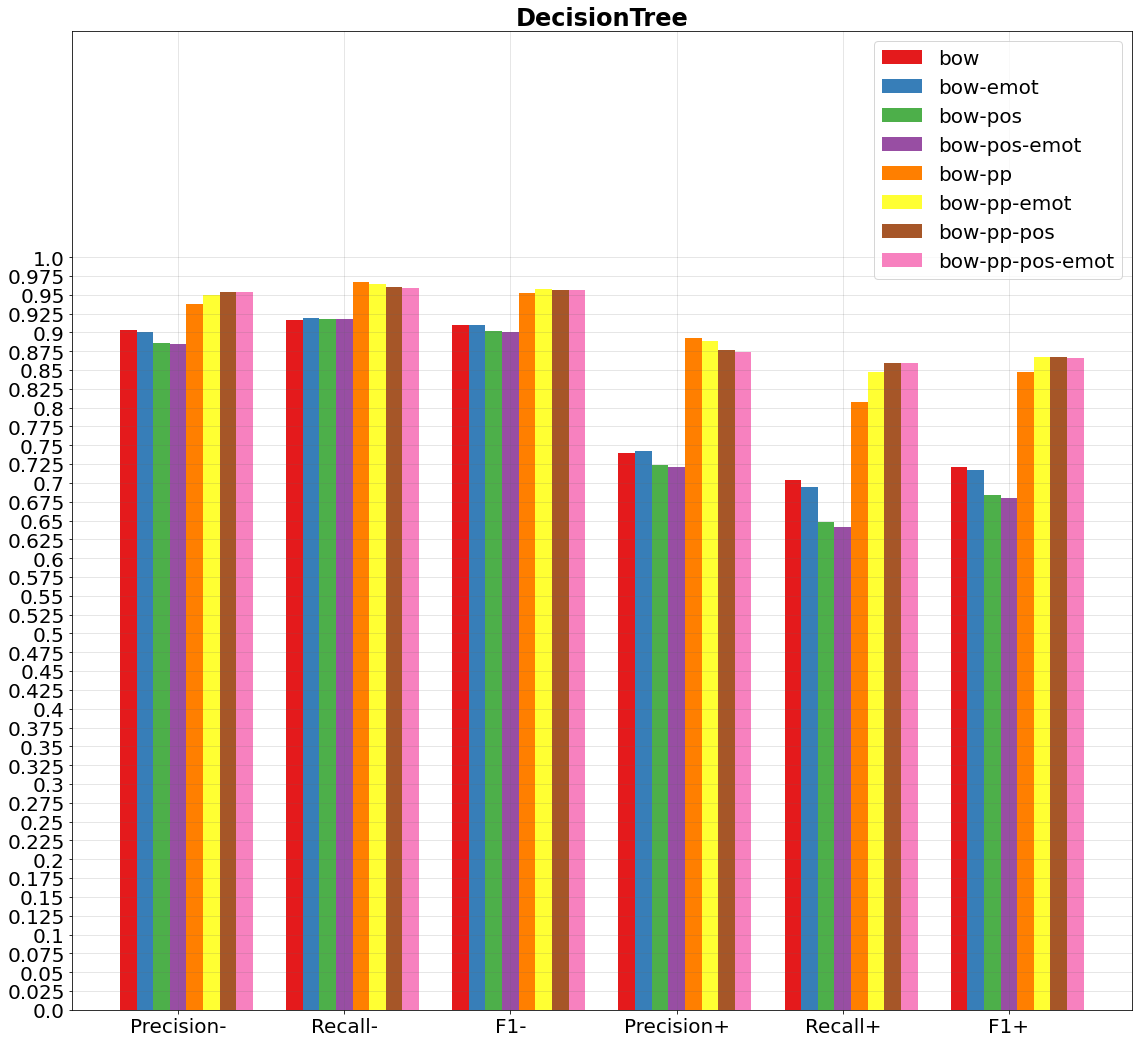

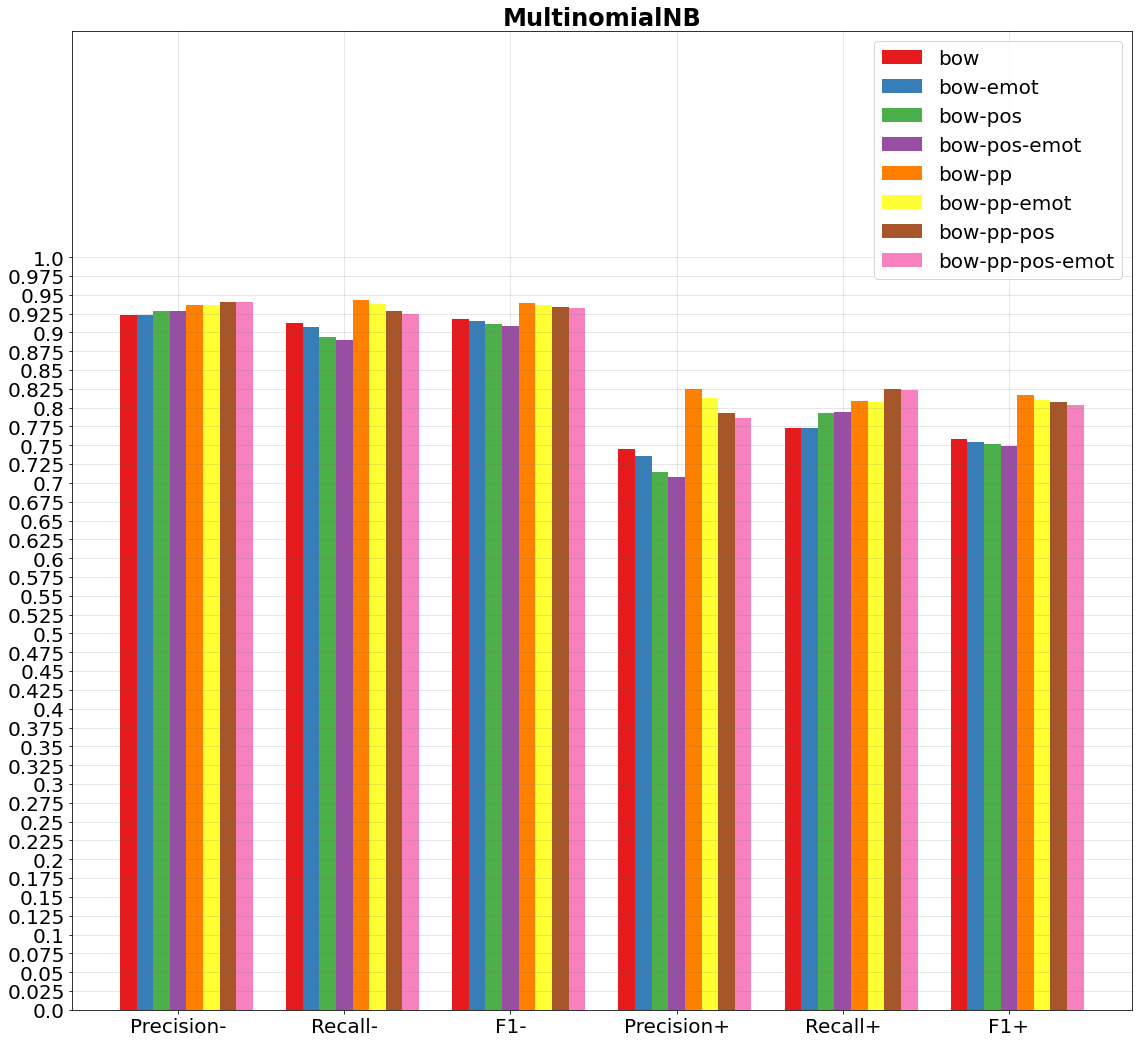

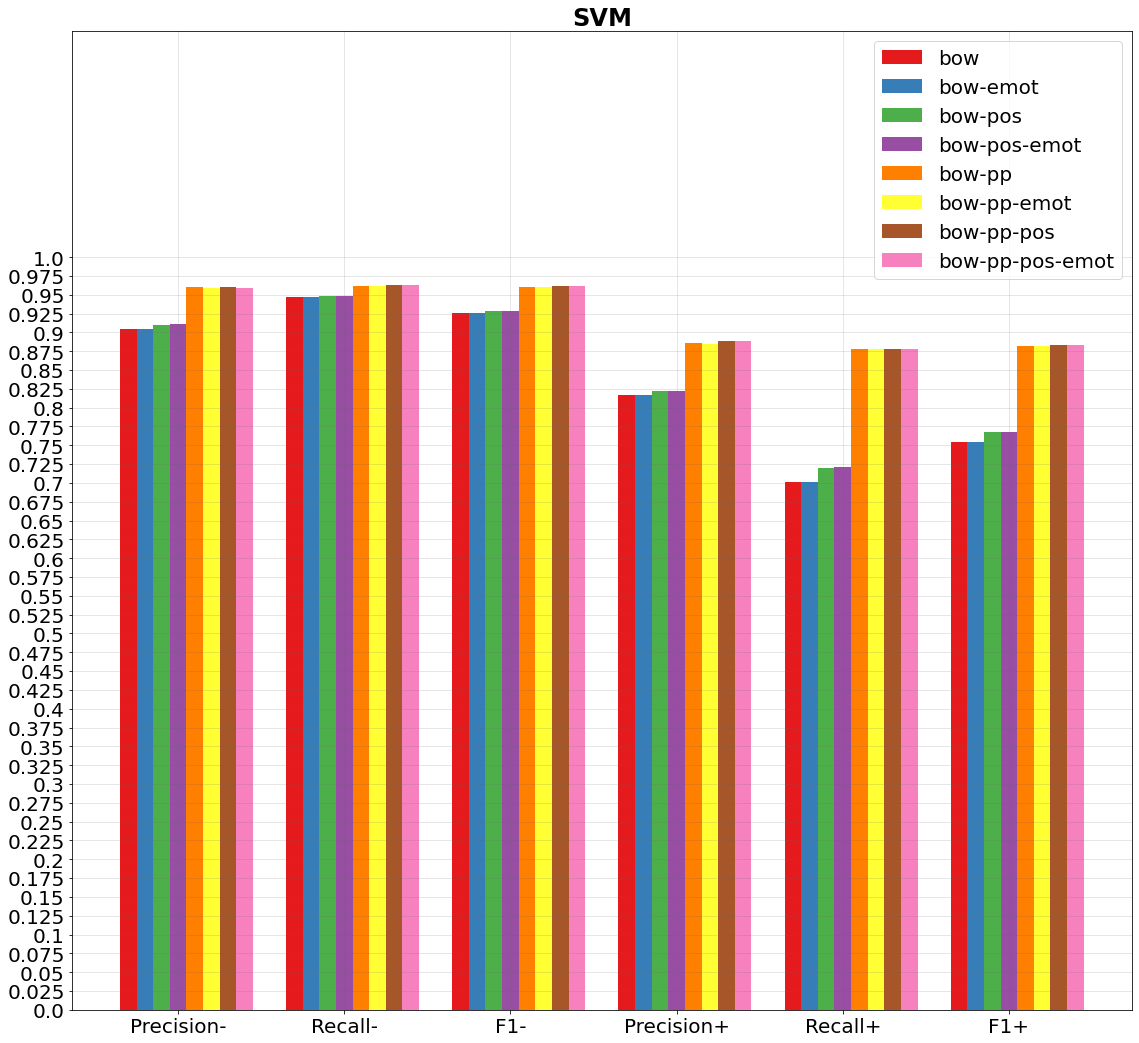

In [98]:
features_list = df_bow['features'].unique()
# Swap element
features_list[3],features_list[4] = features_list[4], features_list[3] 
# Plot each classifier
for classifier in df_bow['classifier'].unique():
	emotions_data = evaluate_emotions_data(df_bow, classifier)
	plot_emotions(emotions_data, classifier)

### Features senza BOW

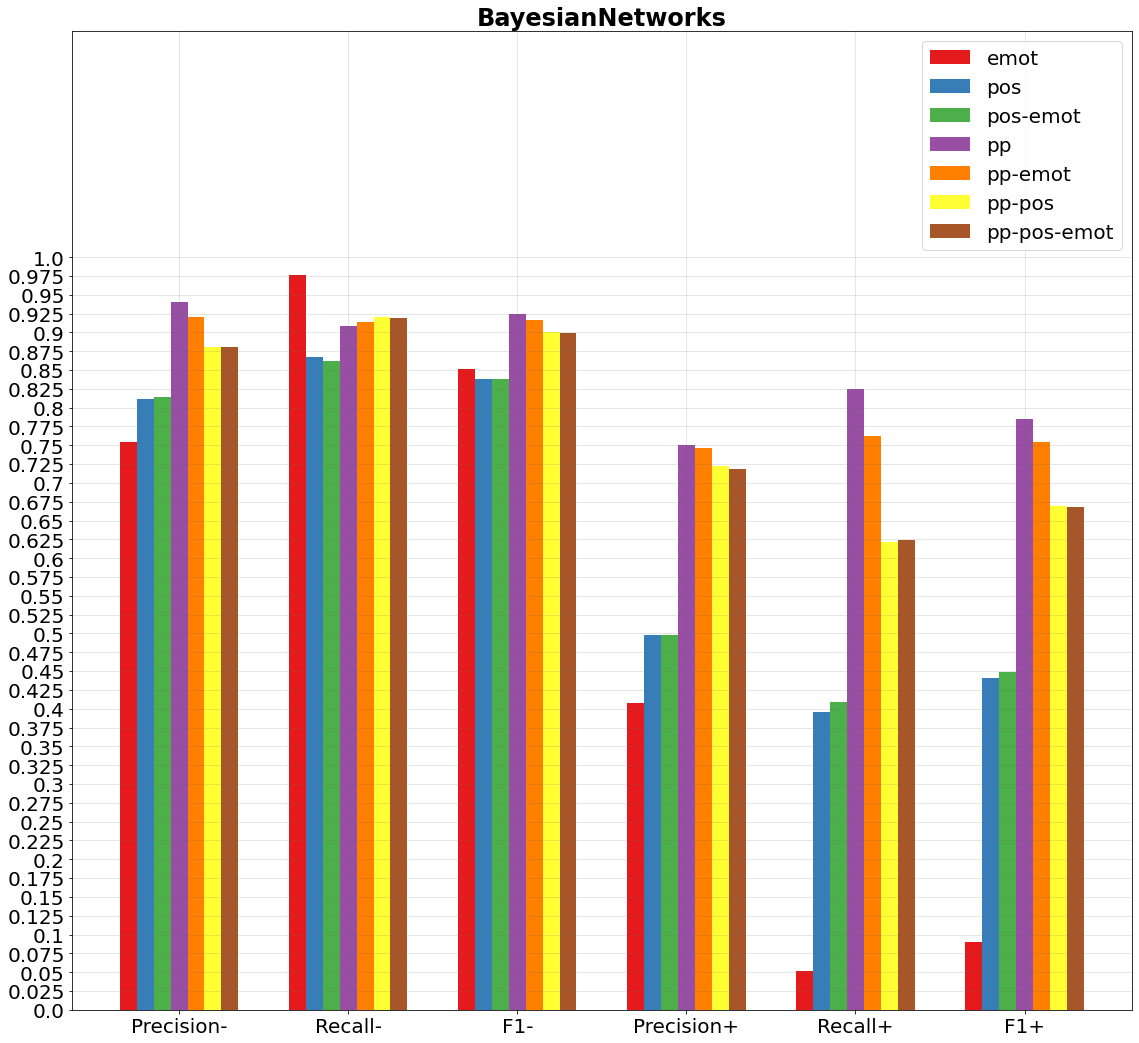

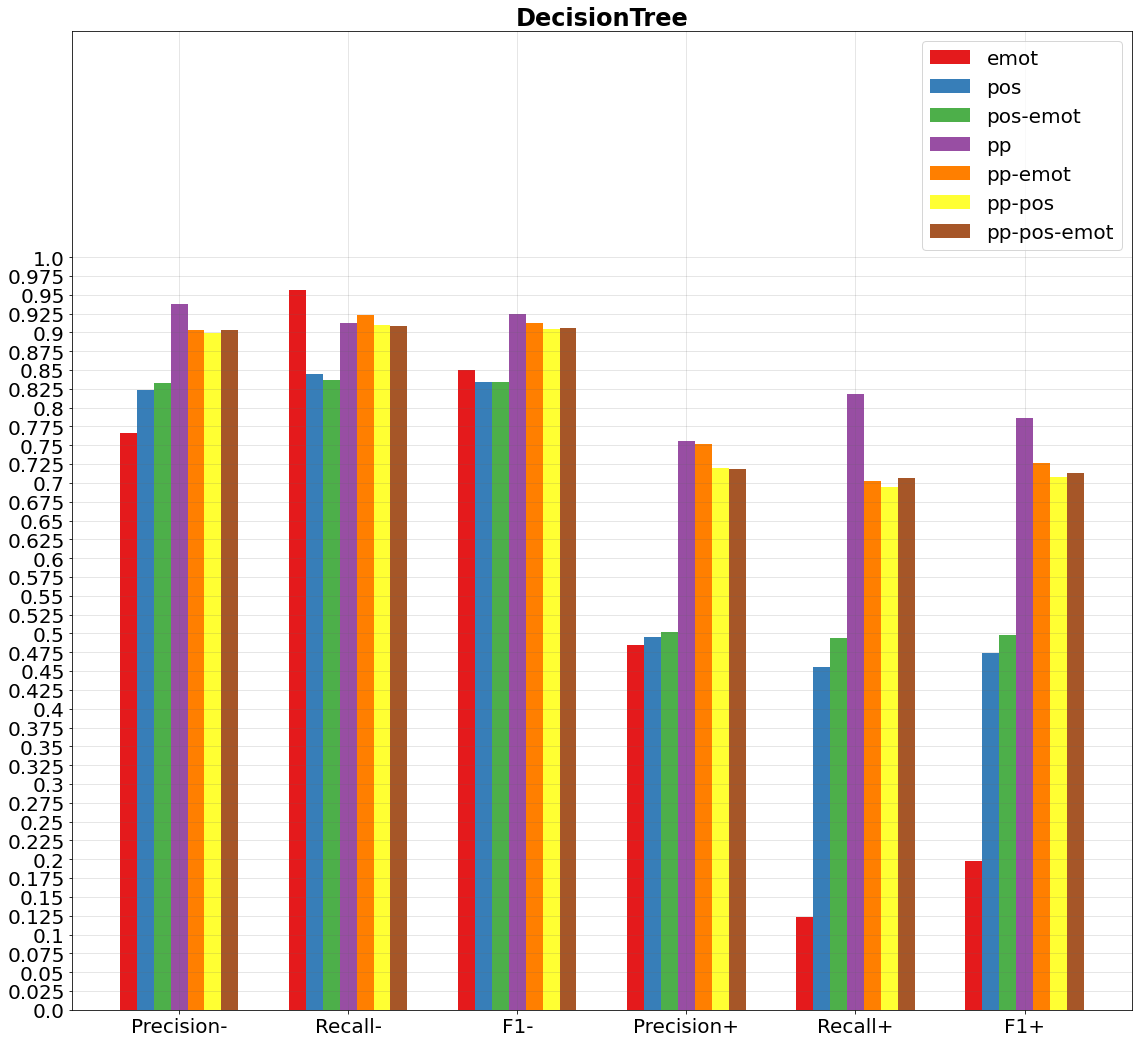

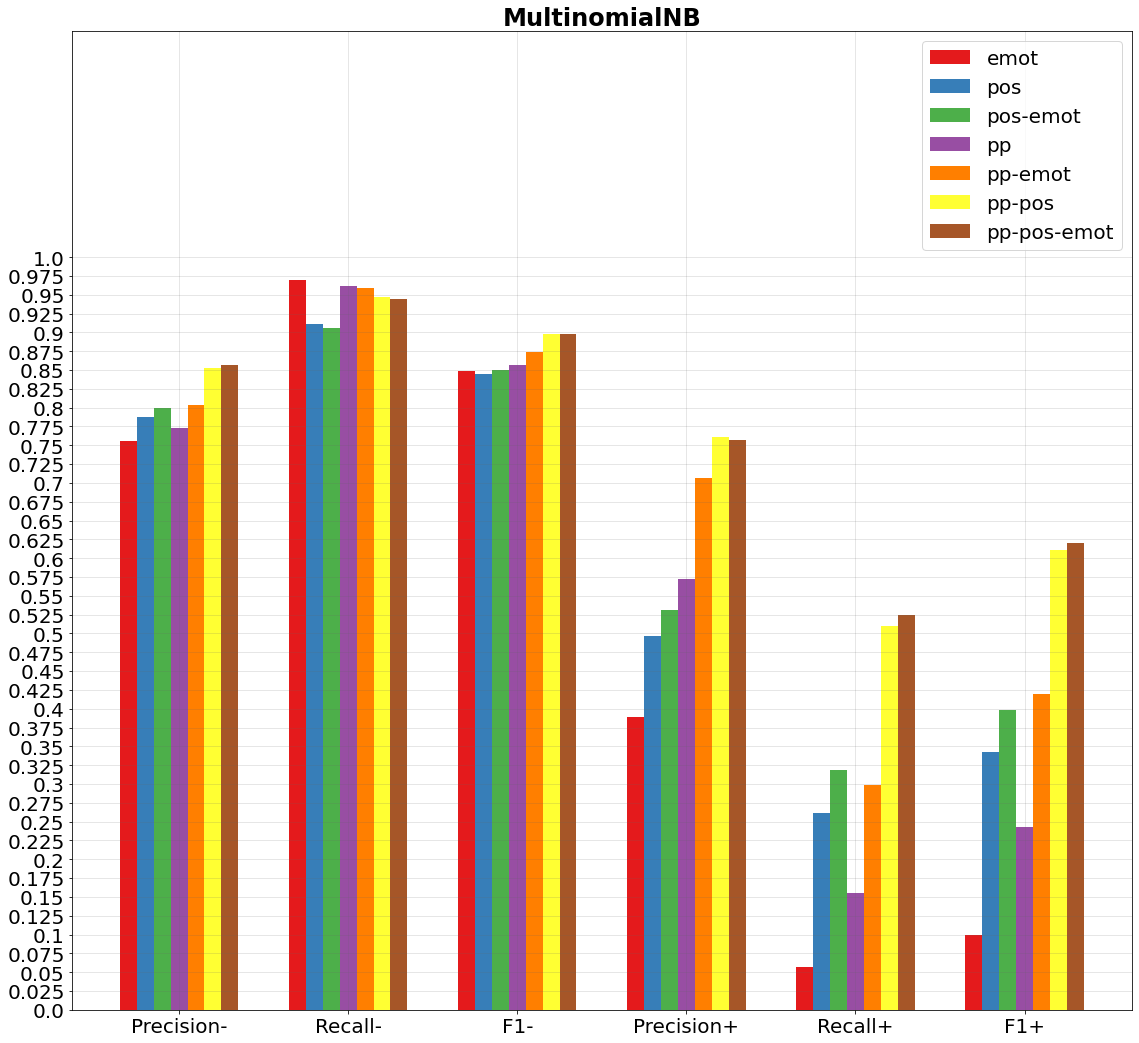

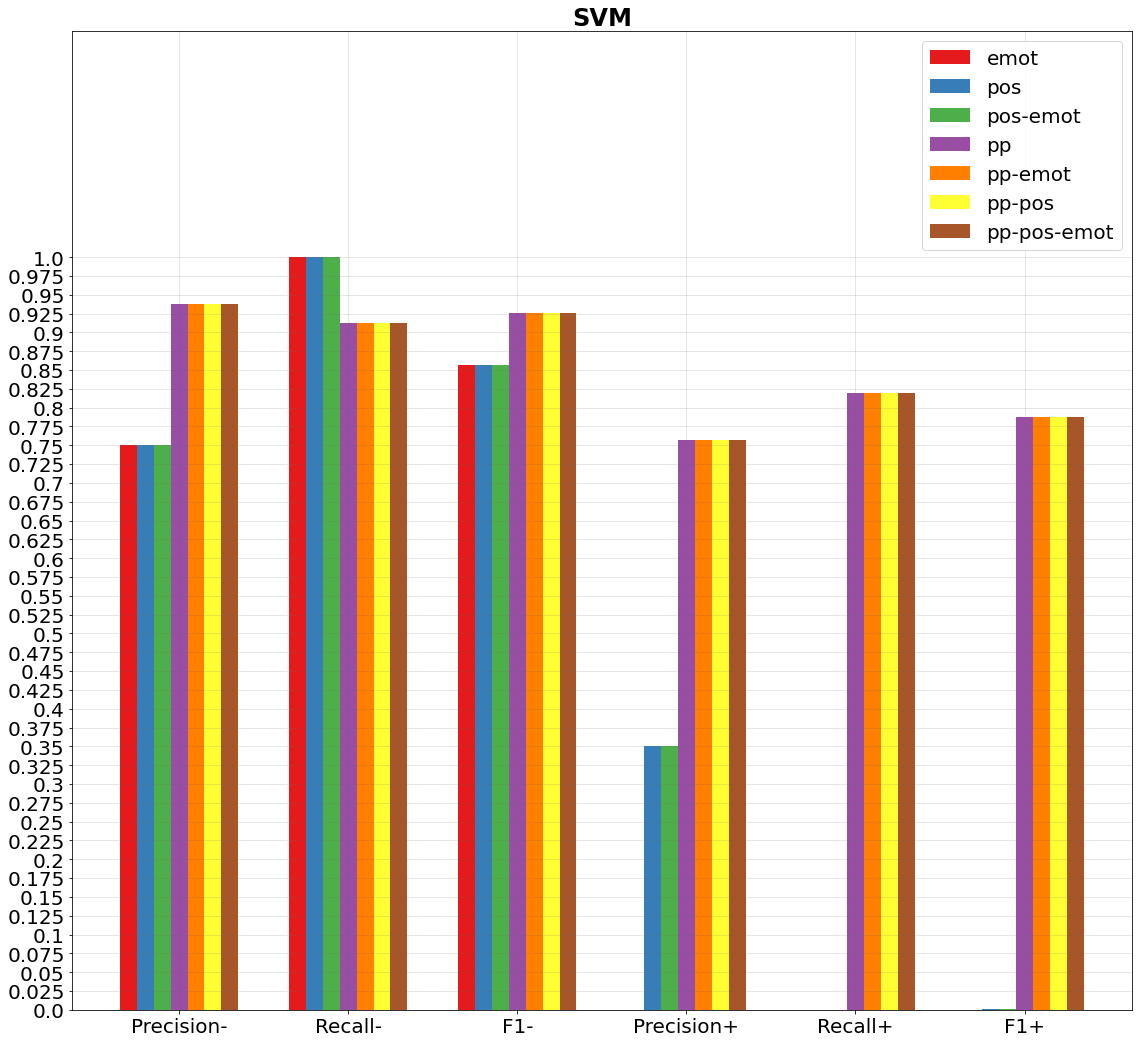

In [99]:
features_list = df_nobow['features'].unique()
# Swap element
features_list[2],features_list[3] = features_list[3], features_list[2] 
# Plot each classifier
for classifier in df_nobow['classifier'].unique():
	emotions_data = evaluate_emotions_data(df_nobow, classifier)
	plot_emotions(emotions_data, classifier)

## Confusion matrix

In [100]:
import seaborn as sns

def confusion_matrix_data(df):
	confusion_matrix_list = []
	for feature in features_list:
		values = []
		for classifier in classifer_list:
			matrix = df[((df['features'] == feature) & (df['classifier'] == classifier))]
			values.append(np.array(matrix['confusion-matrix'].values[0]))
		confusion_matrix_list.append(values)
	return confusion_matrix_list

def plot_confusion_matrix(cm, title='Confusion matrix'):
	target_names = ['Non Ironic', 'Ironic']
	sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1,  square=True)
	plt.title(title)
	tick_marks = np.arange(len(target_names))
	plt.xticks(tick_marks + 0.5, target_names, rotation=45)
	plt.yticks(tick_marks + 0.5, target_names, va="center", rotation=45)
	
def plot_all_confusion_matrix(features_list, classifer_list, confusion_matrix_list):
	for i, feature in enumerate(features_list):
		plt.figure(figsize=(26, 5))
		for j, classifier in enumerate(classifer_list):	
			# Compute confusion 
			cm = confusion_matrix_list[i][j]
			cm_normalized = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
			plt.subplot(1, len(classifer_list), j+1)
			plot_confusion_matrix(cm_normalized, title=classifier)
		#plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)
		plt.tight_layout(pad=0.2, w_pad=0.2)
		plt.suptitle(feature.upper(), fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'}, y=1.1, ha='center')
		plt.show()

### Usando feature testuali

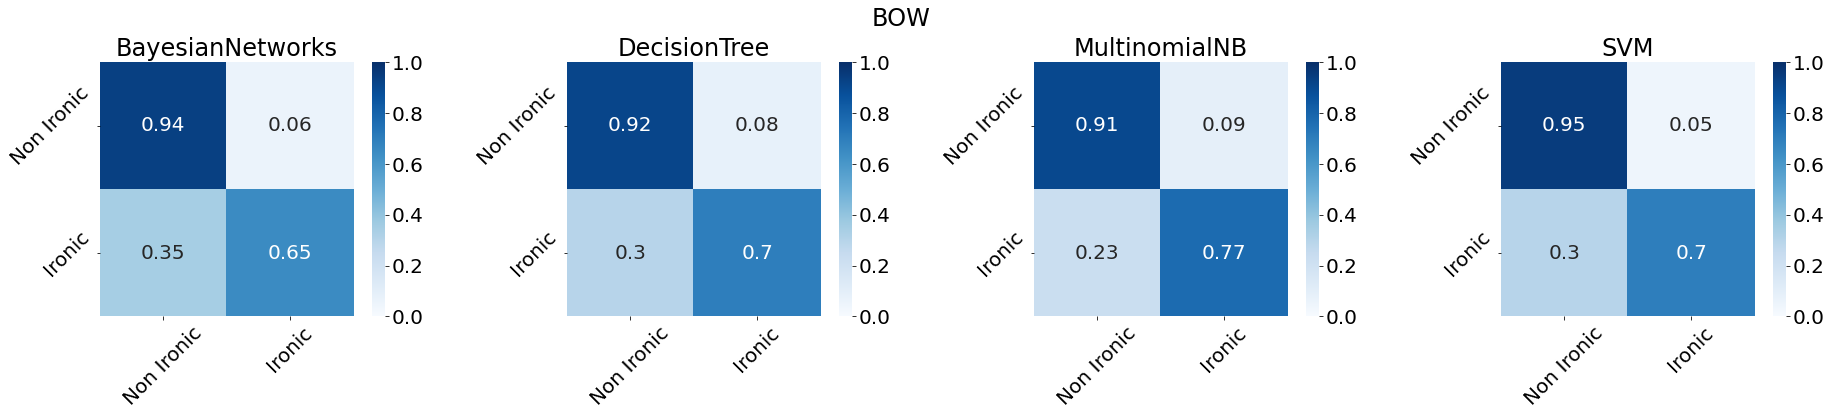

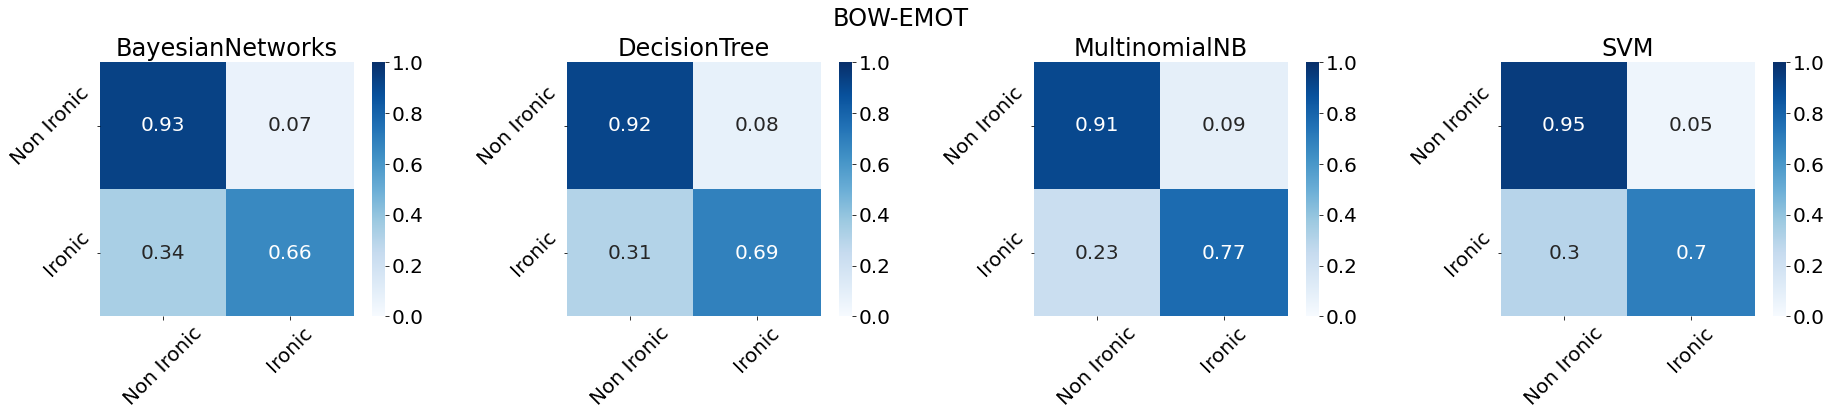

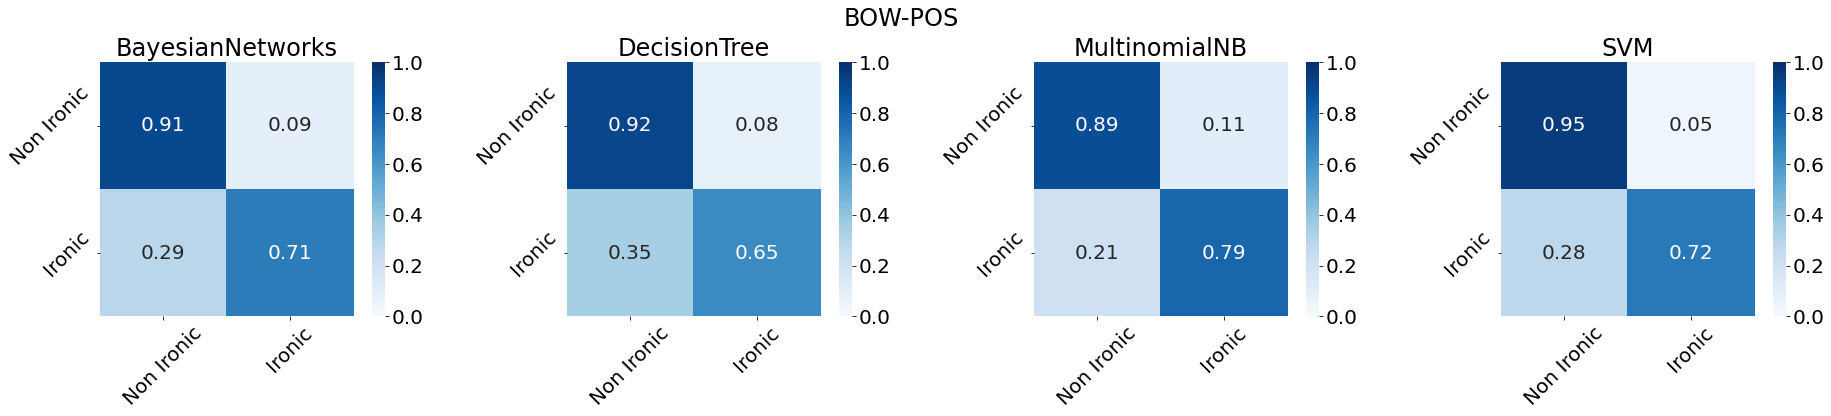

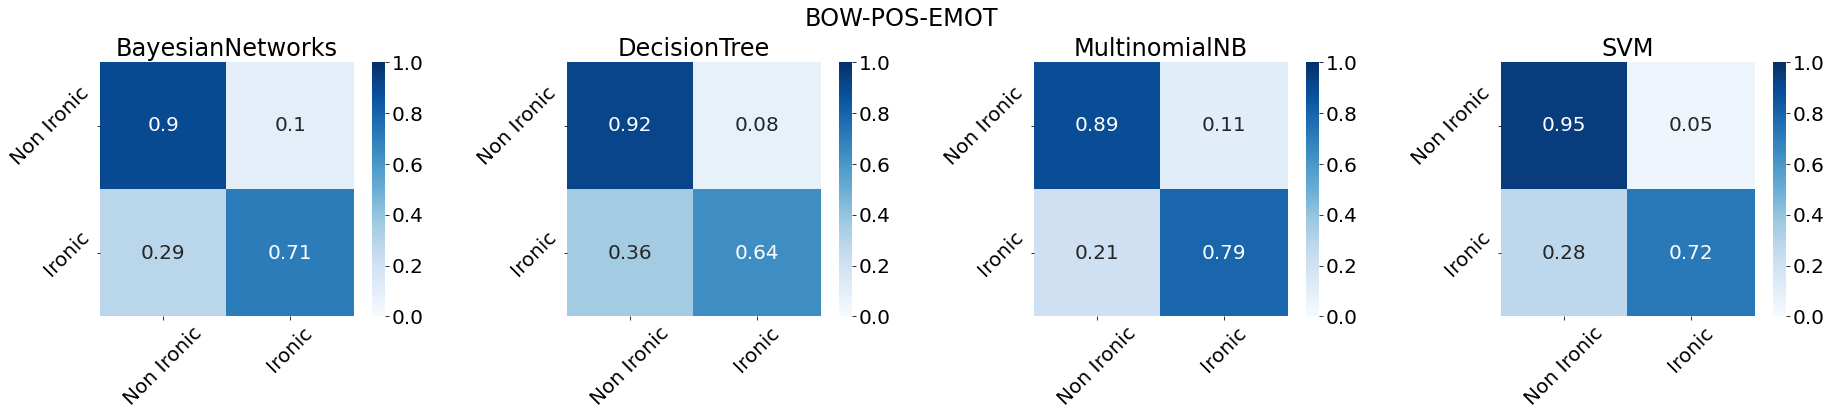

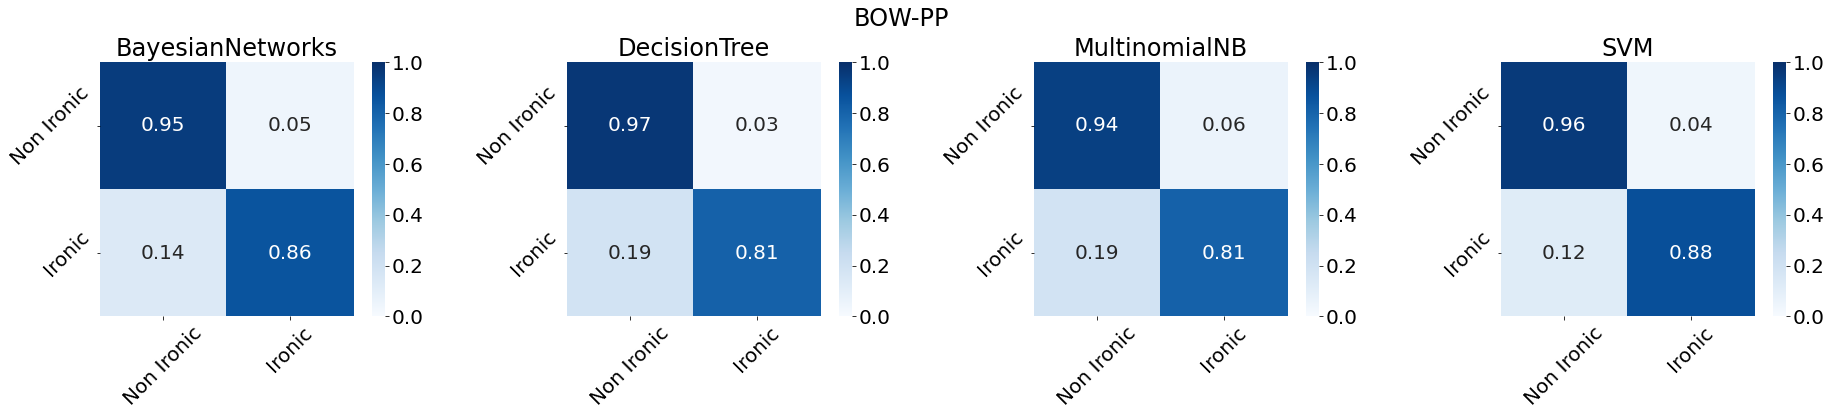

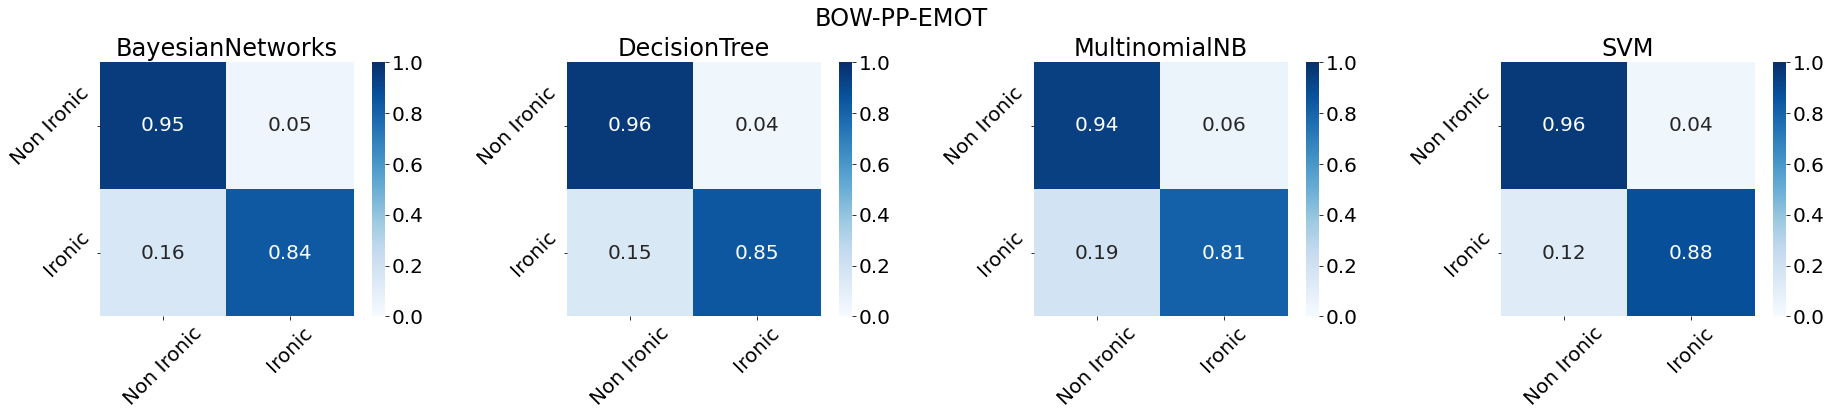

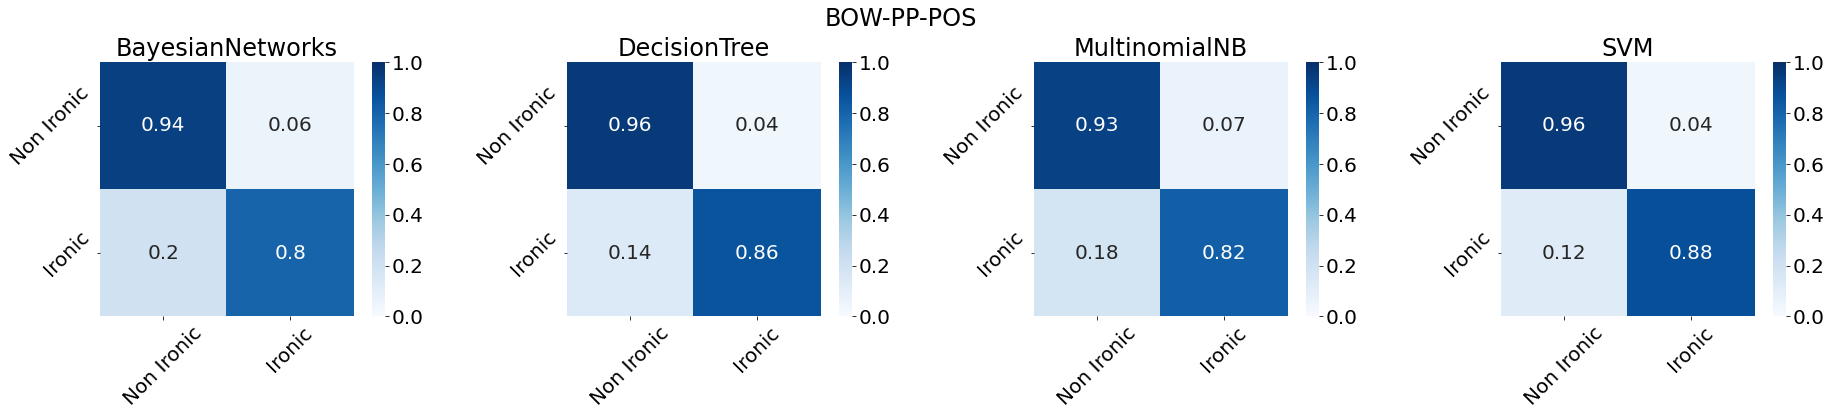

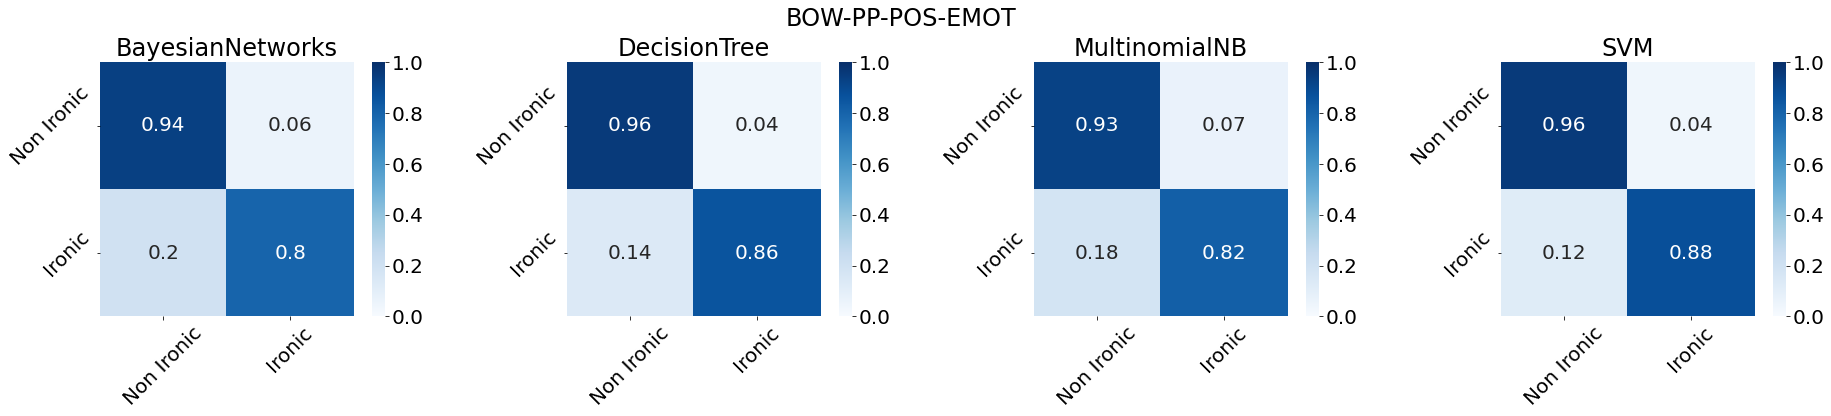

In [101]:
# Plot confusion matrix
classifer_list = df_bow['classifier'].unique()
# Features list
features_list = df_bow['features'].unique()
features_list[3], features_list[4] = features_list[4], features_list[3]
# Confusion matrix
confusion_matrix_list = confusion_matrix_data(df_bow)
plot_all_confusion_matrix(features_list, classifer_list, confusion_matrix_list)

### Senza usare feature testuali

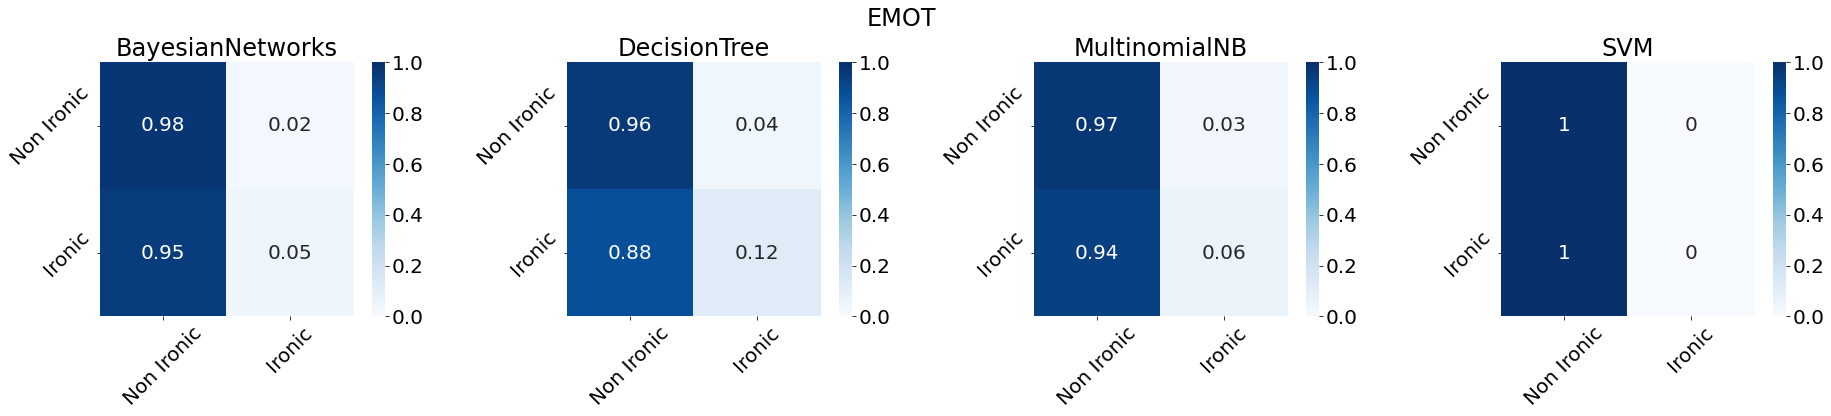

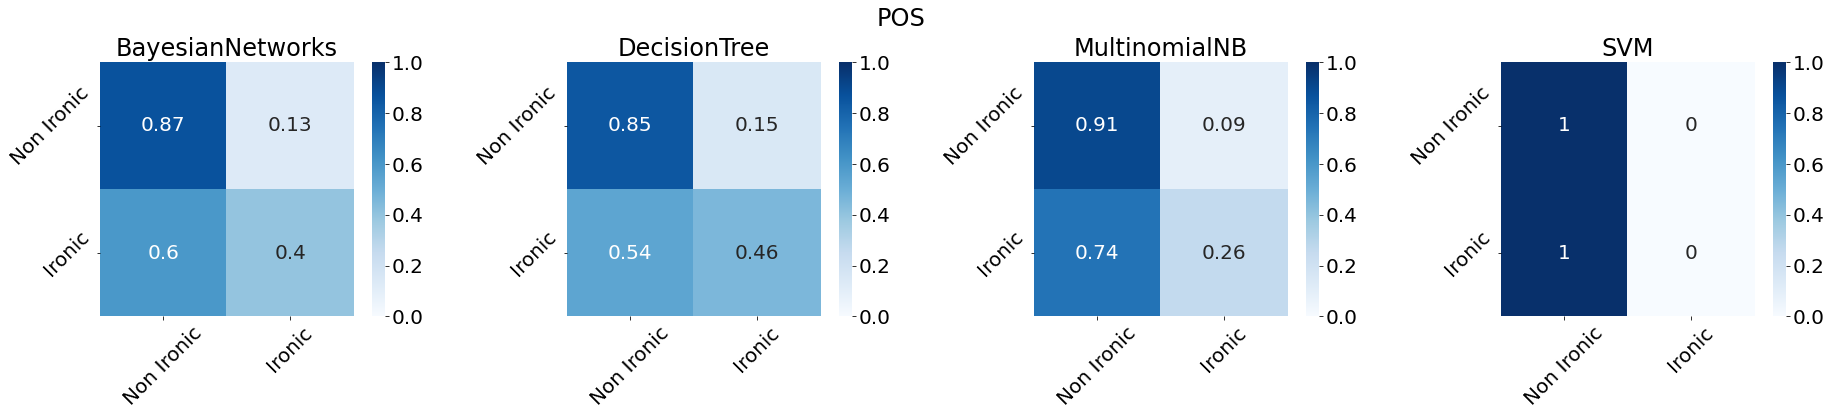

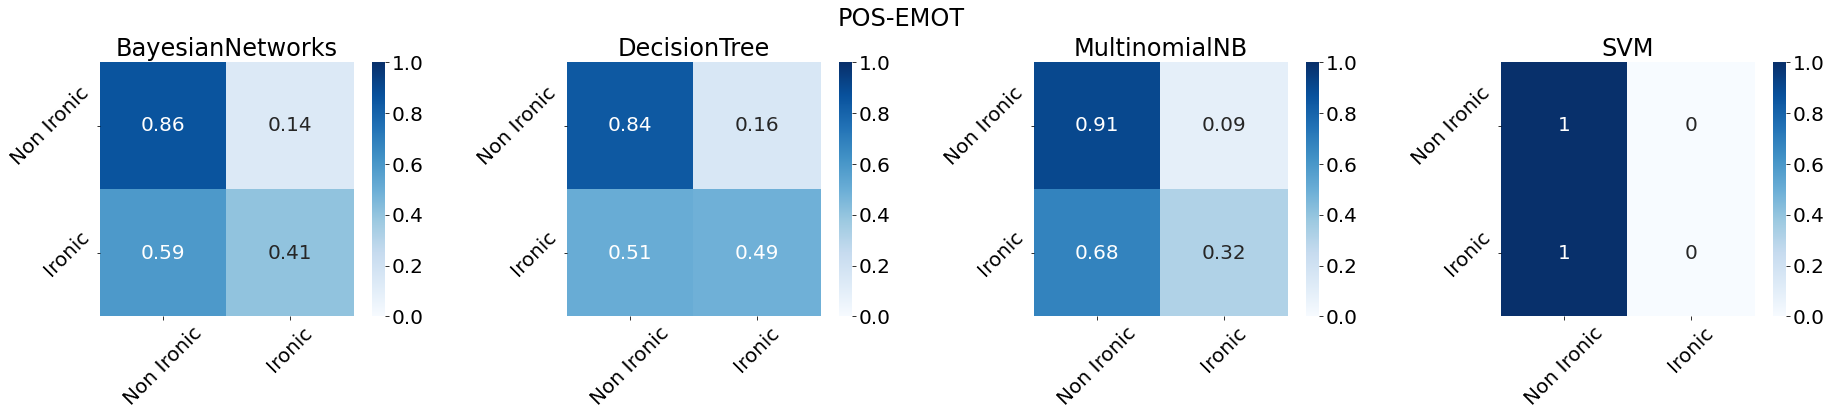

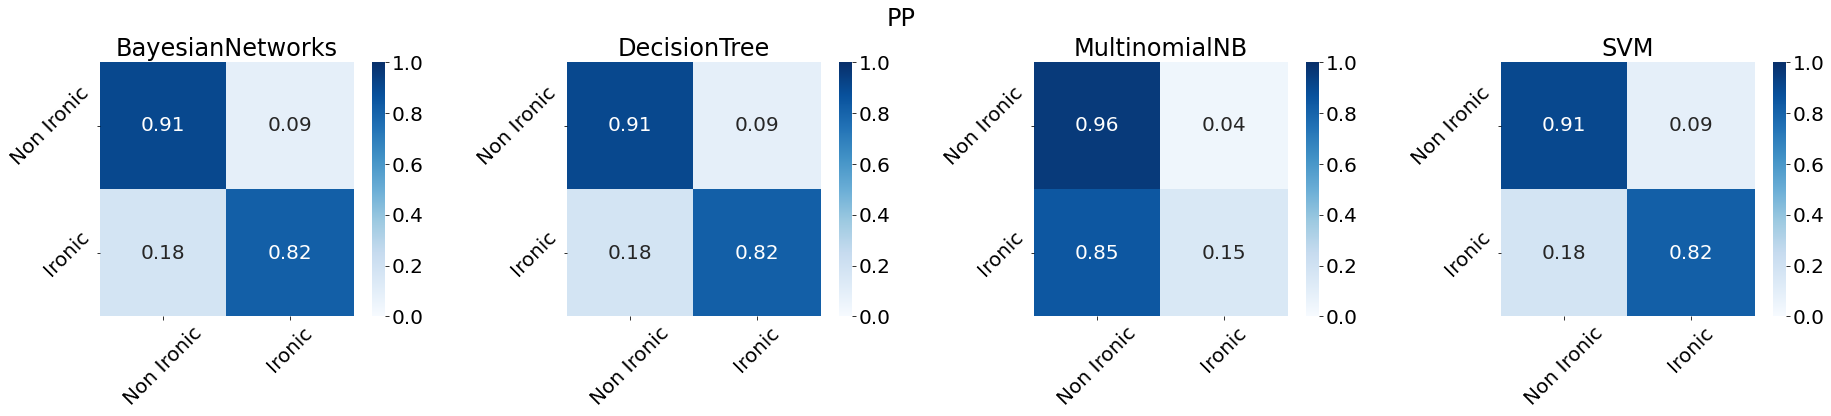

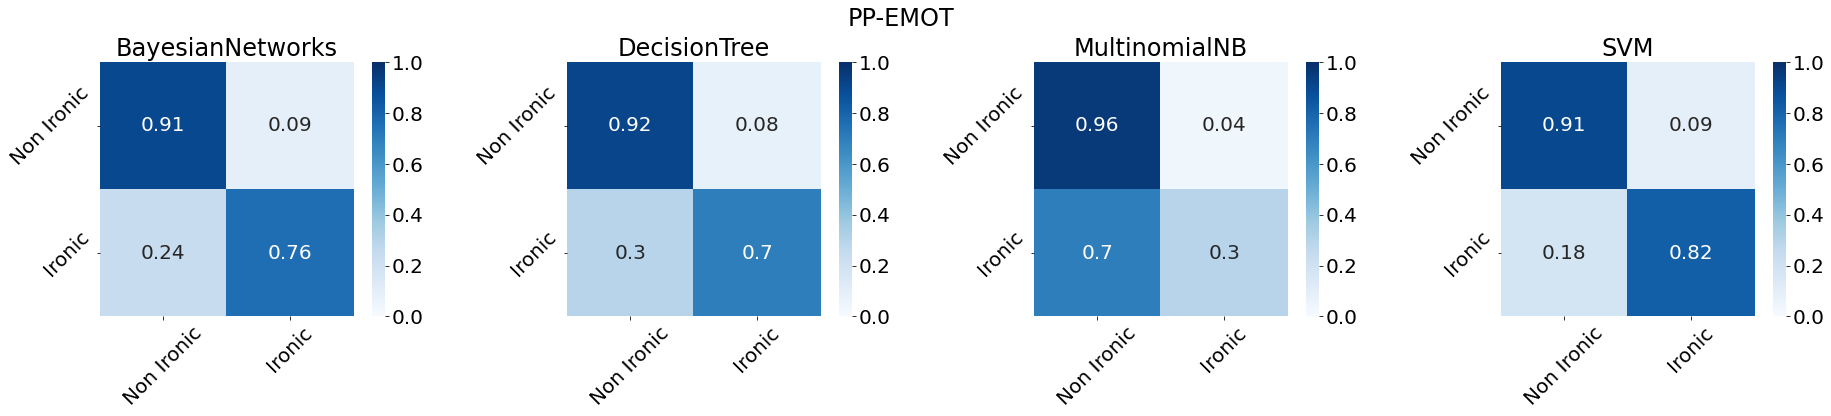

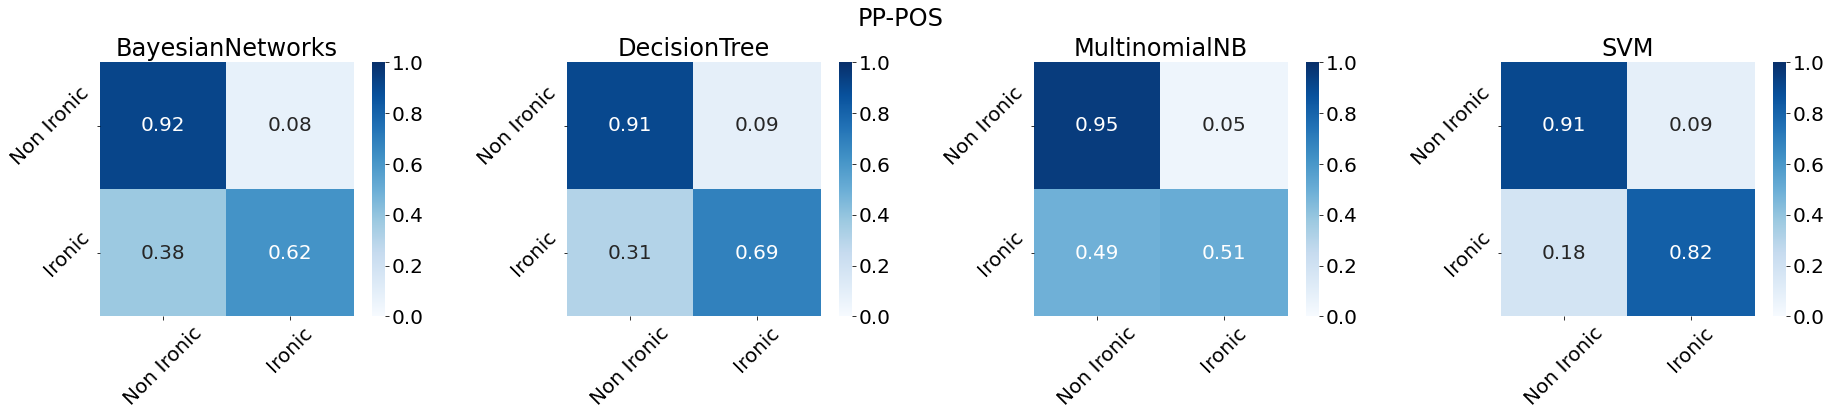

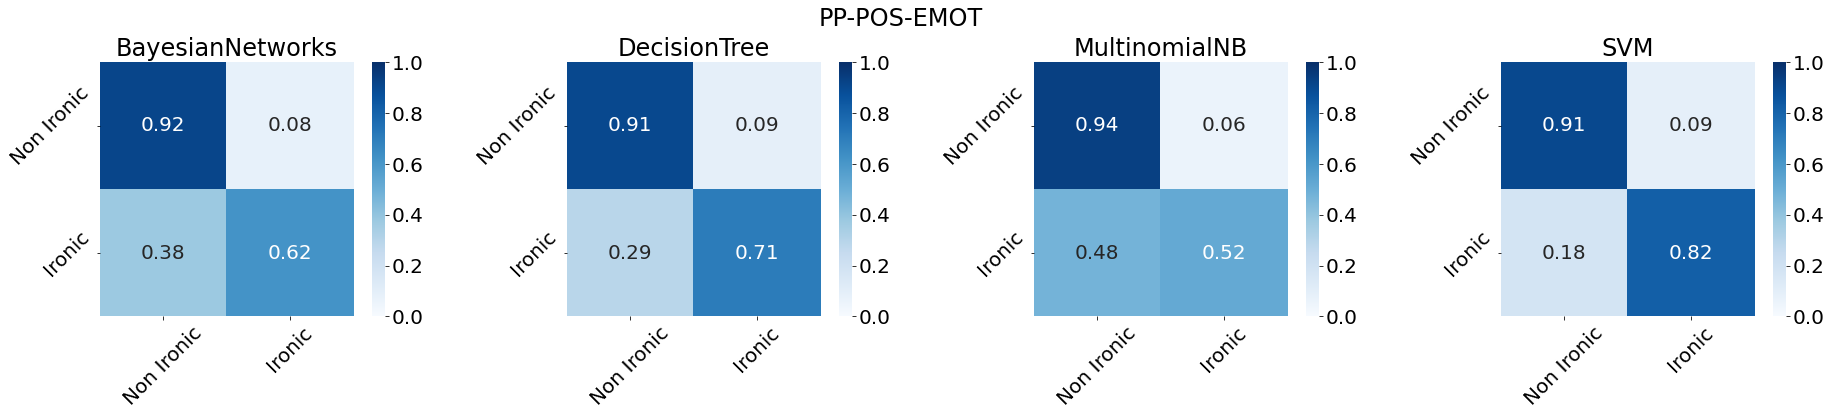

In [102]:
classifer_list = df_nobow['classifier'].unique()
# Features list
features_list = df_nobow['features'].unique()
features_list[2], features_list[3] = features_list[3], features_list[2]
# Confusion matrix
confusion_matrix_list = confusion_matrix_data(df_nobow)
plot_all_confusion_matrix(features_list, classifer_list, confusion_matrix_list)

## BERT: Sentence embeddings a partire da word embeddings 
Per creare le feature testuali con BERT considero ogni documento e creo un tensore:

`12 x #Tokens x 768` 

Considero quindi l'ultimo layer della rete neurale e faccio la media aggregando i tokens

La matrice risultante sarà di tipo float della forma:

`#Documenti x 768` 

### Lista dei file di report relativi alla feature testuale generata da BERT

In [103]:
# Read Bert report
report_file_list_bert = read_file_list('bert')
sorted(report_file_list_bert)

['bert$DecisionTreeClassifier.json',
 'bert$SVC.json',
 'bert-emot$DecisionTreeClassifier.json',
 'bert-emot$SVC.json',
 'bert-pos$DecisionTreeClassifier.json',
 'bert-pos$SVC.json',
 'bert-pos-emot$DecisionTreeClassifier.json',
 'bert-pos-emot$SVC.json',
 'bert-pp$DecisionTreeClassifier.json',
 'bert-pp$SVC.json',
 'bert-pp-emot$DecisionTreeClassifier.json',
 'bert-pp-emot$SVC.json',
 'bert-pp-pos$DecisionTreeClassifier.json',
 'bert-pp-pos$SVC.json',
 'bert-pp-pos-emot$DecisionTreeClassifier.json',
 'bert-pp-pos-emot$SVC.json']

### Dataframe BERT

In [104]:
report_bert = read_report_file(report_file_list_bert)
df_bert = json_normalize(report_bert)
df_bert.head()

,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
0,DecisionTree,bert,"[[26162.0, 3838.0], [3848.0, 6152.0]]",0.807850,0.871798,0.872072,0.871918,30000.0,0.615857,0.615201,0.615420,10000.0,0.743828,0.743637,0.743669,40000.0,0.807845,0.807850,0.807807,40000.0
1,SVM,bert,"[[28830.0, 1170.0], [1706.0, 8294.0]]",0.928100,0.944132,0.960998,0.952489,30000.0,0.876382,0.829377,0.852215,10000.0,0.910257,0.895188,0.902352,40000.0,0.927202,0.928100,0.927428,40000.0
2,DecisionTree,bert-emot,"[[26179.0, 3821.0], [3881.0, 6119.0]]",0.807450,0.870919,0.872633,0.871754,30000.0,0.615655,0.611870,0.613624,10000.0,0.743287,0.742251,0.742689,40000.0,0.807126,0.807450,0.807238,40000.0
3,SVM,bert-emot,"[[28854.0, 1146.0], [1729.0, 8271.0]]",0.928125,0.943467,0.961797,0.952541,30000.0,0.878352,0.827084,0.851919,10000.0,0.910909,0.894440,0.902230,40000.0,0.927193,0.928125,0.927391,40000.0
4,DecisionTree,bert-pos,"[[26176.0, 3824.0], [3859.0, 6141.0]]",0.807925,0.871548,0.872541,0.872022,30000.0,0.616328,0.614162,0.615100,10000.0,0.743938,0.743352,0.743561,40000.0,0.807776,0.807925,0.807797,40000.0


## Sentence-BERT: Sentence Embeddings utilizzando Siamese BERT-Networks
- Paper: `Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks` (https://arxiv.org/abs/1908.10084)
- Repository: https://github.com/UKPLab/sentence-transformers

### Lista dei file di report relativi alla feature testuale generata da Sentence-BERT

In [ ]:
# Read Sentence-BERT report
report_file_list_sbert = read_file_list('sbert')
sorted(report_file_list_sbert)

### Dataframe Sentence-BERT

In [ ]:
report_sbert = read_report_file(report_file_list_sbert)
df_sbert = json_normalize(report_sbert)
df_sbert.head()

## BOW vs BERT vs Sentence-BERT
#### Weighted average
- Accuracy - {bow, bert, sbert}
- F1 score - {bow, bert, sbert}

In [ ]:
# Read Bert report
features_list = [(lambda x : '-'.join(['{}'] + x[1:]))(feature.split('-'))
				 for feature in df_bert['features'].unique()]
features_list[3], features_list[4] = features_list[4], features_list[3]
reports_list = ['weighted avg.f1-score', 'accuracy']

def evaluate_bow_vs_bert(classifier, report):
    plot_values = []
    for feature in features_list:
        values = []
        for df, text_feature in zip([df_bow, df_bert, df_sbert], ['bow', 'bert', 'sbert']):
            value = df[((df['features'] == feature.format(text_feature)) &
                        (df['classifier'] == classifier))][report]
            values.append(float(value))
        plot_values.append(values)
    plot_values = np.transpose(np.array(plot_values))
    return plot_values

def plot_bow_vs_bert(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, Y_SIZE))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	target_text_list = ['bow', 'bert', 'sbert']
	zip_data = zip(plot_values, target_text_list, colors)
	for i, (values, text_feature, color) in enumerate(zip_data):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=text_feature)
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.format('{text}').split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.775
	plt.ylim(min_value - min_value * 0.05, 1.02)
	# Legend
	ax.legend()
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()

### Accuracy
Weighted Average

In [ ]:
for classifier in df_bert['classifier'].unique():
    plot_values = evaluate_bow_vs_bert(classifier, 'accuracy')
    plot_bow_vs_bert(plot_values, classifier)

### F1 score
Weighted Average

In [ ]:
for classifier in df_bert['classifier'].unique():
    plot_values = evaluate_bow_vs_bert(classifier, 'weighted avg.f1-score')
    plot_bow_vs_bert(plot_values, classifier)

In [105]:
for classifier in df_bert['classifier'].unique():
    plot_values = evaluate_bow_vs_bert(classifier, 'weighted avg.f1-score')
    plot_bow_vs_bert(plot_values, classifier)

['sbert$DecisionTreeClassifier.json',
 'sbert$SVC.json',
 'sbert-emot$DecisionTreeClassifier.json',
 'sbert-emot$SVC.json',
 'sbert-pos$DecisionTreeClassifier.json',
 'sbert-pos$SVC.json',
 'sbert-pos-emot$DecisionTreeClassifier.json',
 'sbert-pos-emot$SVC.json',
 'sbert-pp$DecisionTreeClassifier.json',
 'sbert-pp$SVC.json',
 'sbert-pp-emot$DecisionTreeClassifier.json',
 'sbert-pp-emot$SVC.json',
 'sbert-pp-pos$DecisionTreeClassifier.json',
 'sbert-pp-pos$SVC.json',
 'sbert-pp-pos-emot$DecisionTreeClassifier.json',
 'sbert-pp-pos-emot$SVC.json']

### Dataframe Sentence-BERT

In [106]:
report_sbert = read_report_file(report_file_list_sbert)
df_sbert = json_normalize(report_sbert)
df_sbert.head()

,classifier,features,confusion-matrix,accuracy,False.precision,False.recall,False.f1-score,False.support,True.precision,True.recall,True.f1-score,True.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
0,DecisionTree,sbert,"[[25750.0, 4250.0], [4209.0, 5791.0]]",0.788525,0.859523,0.858332,0.858910,30000.0,0.576821,0.579224,0.577918,10000.0,0.718172,0.718778,0.718414,40000.0,0.788867,0.788525,0.788657,40000.0
1,SVM,sbert,"[[28579.0, 1421.0], [1971.0, 8029.0]]",0.915200,0.935496,0.952632,0.943978,30000.0,0.849714,0.802866,0.825555,10000.0,0.892605,0.877749,0.884766,40000.0,0.914059,0.915200,0.914381,40000.0
2,DecisionTree,sbert-emot,"[[25769.0, 4231.0], [4238.0, 5762.0]]",0.788275,0.858799,0.858965,0.858864,30000.0,0.576545,0.576270,0.576295,10000.0,0.717672,0.717618,0.717579,40000.0,0.788257,0.788275,0.788224,40000.0
3,SVM,sbert-emot,"[[28585.0, 1415.0], [1974.0, 8026.0]]",0.915275,0.935423,0.952832,0.944037,30000.0,0.850231,0.802557,0.825612,10000.0,0.892827,0.877695,0.884825,40000.0,0.914135,0.915275,0.914441,40000.0
4,DecisionTree,sbert-pos,"[[25730.0, 4270.0], [4244.0, 5756.0]]",0.787150,0.858424,0.857664,0.858029,30000.0,0.574163,0.575629,0.574803,10000.0,0.716294,0.716647,0.716416,40000.0,0.787381,0.787150,0.787231,40000.0


## BOW vs BERT vs Sentence-BERT
#### Weighted average
- Accuracy - {bow, bert, sbert}
- F1 score - {bow, bert, sbert}

In [143]:
# Read Bert report
features_list = [(lambda x : '-'.join(['{}'] + x[1:]))(feature.split('-'))
				 for feature in df_bert['features'].unique()]
features_list[3], features_list[4] = features_list[4], features_list[3]
reports_list = ['weighted avg.f1-score', 'accuracy']

def evaluate_bow_vs_bert(classifier, report):
    plot_values = []
    for feature in features_list:
        values = []
        for df, text_feature in zip([df_bow, df_bert, df_sbert], ['bow', 'bert', 'sbert']):
            value = df[((df['features'] == feature.format(text_feature)) &
                        (df['classifier'] == classifier))][report]
            values.append(float(value))
        plot_values.append(values)
    plot_values = np.transpose(np.array(plot_values))
    return plot_values

def plot_bow_vs_bert(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, Y_SIZE))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	target_text_list = ['bow', 'bert', 'sbert']
	zip_data = zip(plot_values, target_text_list, colors)
	for i, (values, text_feature, color) in enumerate(zip_data):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=text_feature)
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.format('{text}').split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.775
	plt.ylim(min_value - min_value * 0.05, 1.02)
	# Legend
	ax.legend()
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()

### Accuracy
Weighted Average

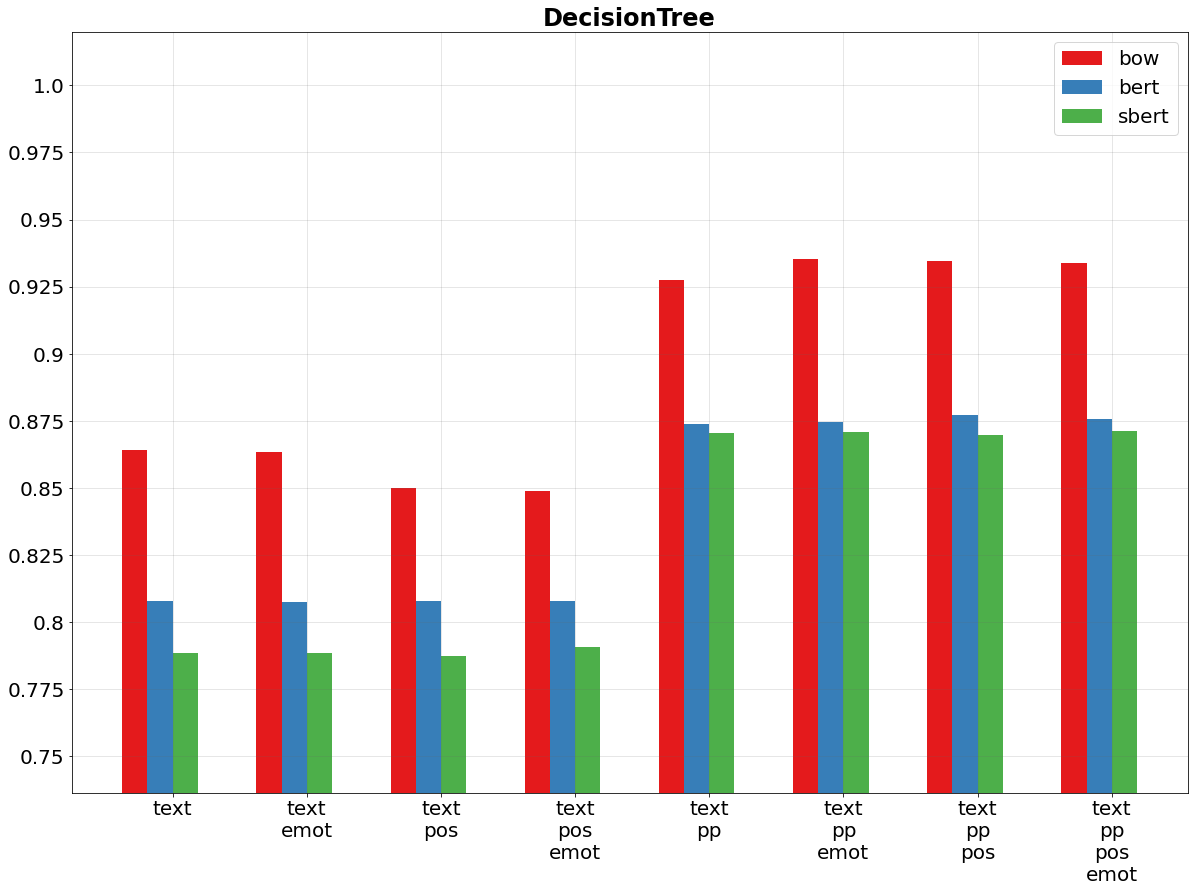

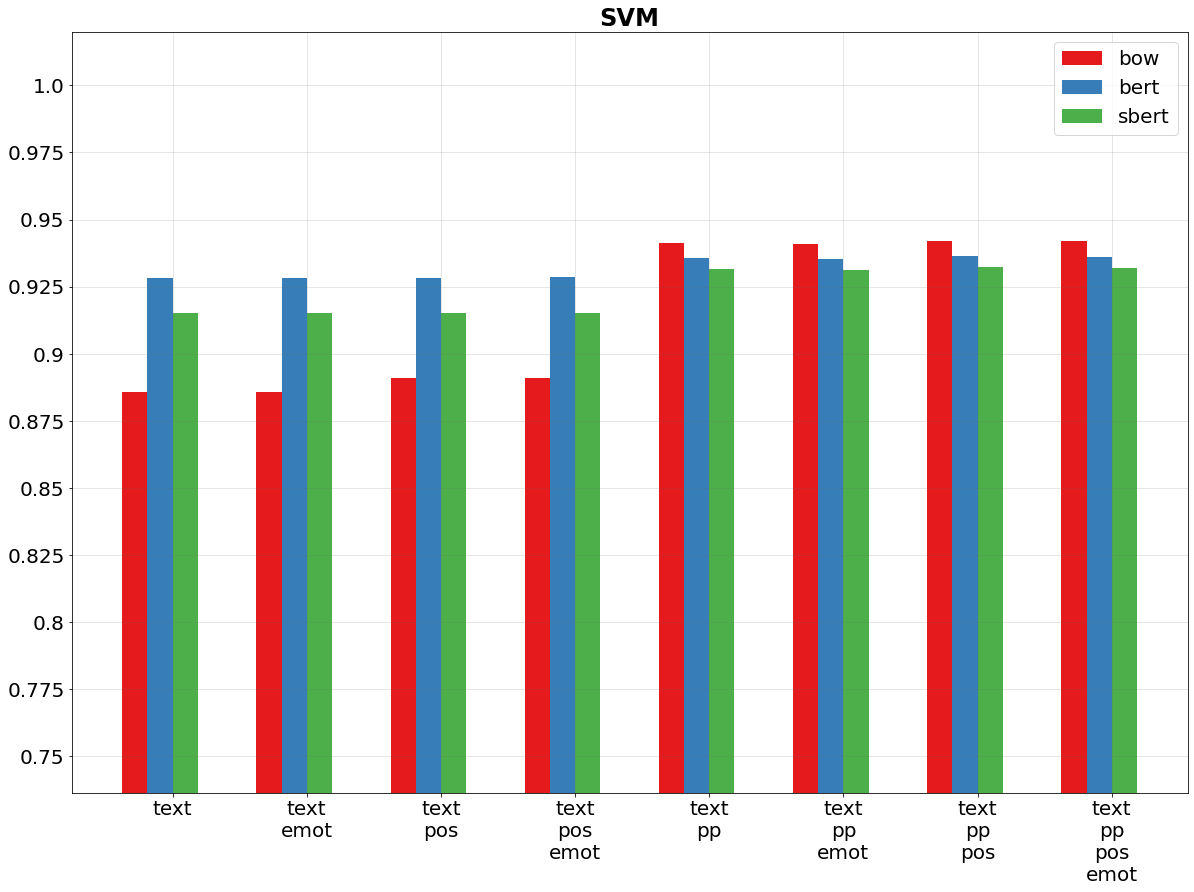

In [146]:
for classifier in df_bert['classifier'].unique():
    plot_values = evaluate_bow_vs_bert(classifier, 'accuracy')
    plot_bow_vs_bert(plot_values, classifier)

### F1 score
Weighted Average

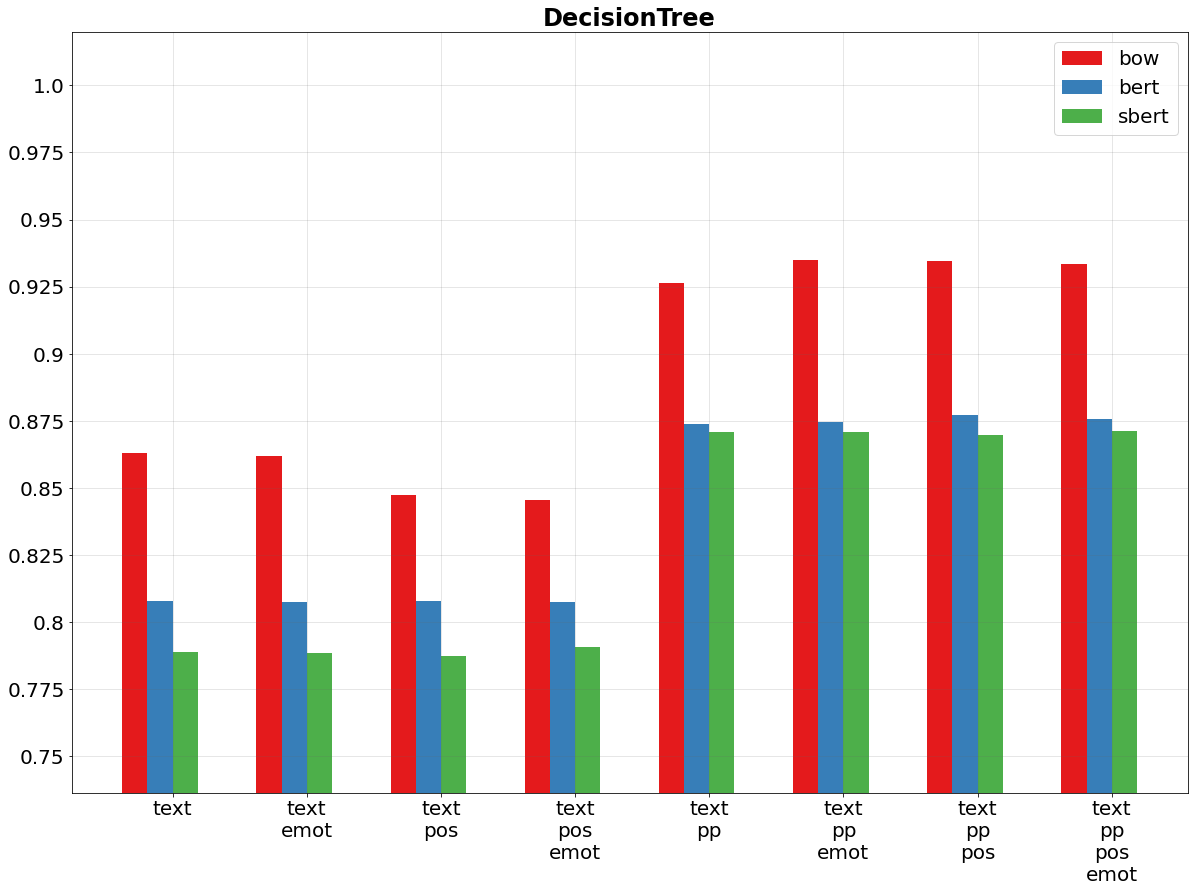

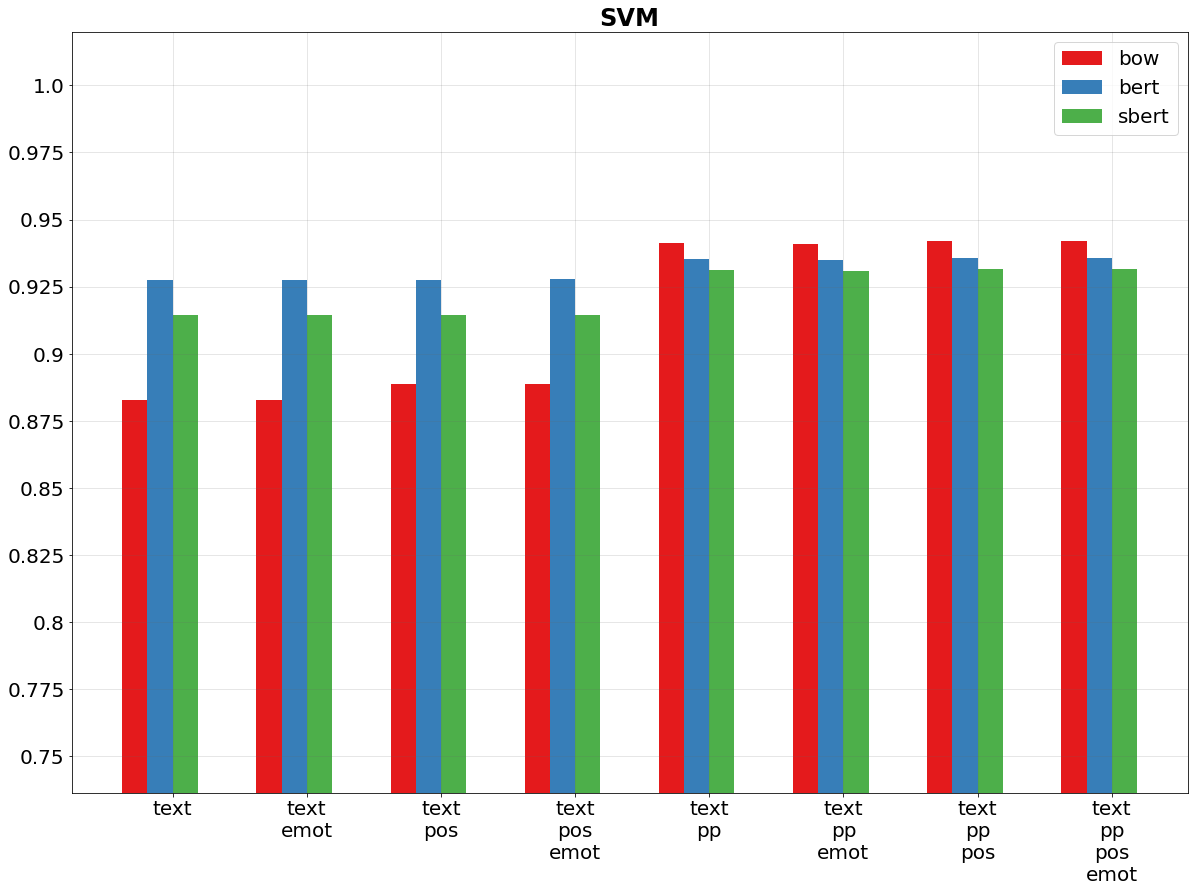

In [147]:
for classifier in df_bert['classifier'].unique():
    plot_values = evaluate_bow_vs_bert(classifier, 'weighted avg.f1-score')
    plot_bow_vs_bert(plot_values, classifier)